<a href="https://colab.research.google.com/github/paulcesarbaruk/Analsying-the-Salary-of-Data-Scientists/blob/main/Analysing_the_Salary_of_Data_Scientists_in_many_countries_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Job Salaries
Imports
Plot Configuration
Loading Dataset
Understanding the Data
1 Checking Null Values
Exploratory Data Analysis
1 Univariate Analysis
1.1 Work Year
1.2 Experience Level
1.3 Employment Type
1.4 Job Title
1.5 Salary
1.6 Employee Residence
1.7 Remote Ratio
1.8 Company Location
1.9 Company Size
2 Multivariate Analysis
2.1 Work Year and Salary
2.2 Experience Level and Salary
2.3 Employment Type and Salary
2.4 Job Title and Salary
2.5 Employee Residence and Salary
2.6 Remote Ratio and Salary
2.7 Company Location and Salary
2.8 Company Size and Salary
Conclusion

In [ ]:
import country_converter as coco
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
np.set_printoptions(precision=5)

# import country_converter as coco

# The country converter (coco) is a Python package to convert country names into different classifications
# and between different naming versions. Internally it uses regular expressions to match country names.

In [ ]:
wages_of_ds = pd.read_csv('ds_salaries.csv') # ETL - Extract, Transform, Load

In [ ]:
wages_of_ds.head()

Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  
1                 JP             0               JP            S  
2                 GB            50               GB            M  
3                 HN             0               HN            S  
4                 US            50               US            L

In [ ]:
wages_of_ds.shape

# This dataset has 607 lines and 12 columns to analysed.

(607, 12)

In [ ]:
wages_of_ds.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [ ]:
wages_of_ds.tail()

# Here we have the last five lines of the dataset

Unnamed: 0  work_year experience_level employment_type      job_title  \
602         602       2022               SE              FT  Data Engineer   
603         603       2022               SE              FT  Data Engineer   
604         604       2022               SE              FT   Data Analyst   
605         605       2022               SE              FT   Data Analyst   
606         606       2022               MI              FT   AI Scientist   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
602  154000             USD         154000                 US           100   
603  126000             USD         126000                 US           100   
604  129000             USD         129000                 US             0   
605  150000             USD         150000                 US           100   
606  200000             USD         200000                 IN           100   

    company_location company_size  
602               US            M  
603               US            M  
604               US            M  
605               US            M  
606               US            L

In [ ]:
wages_of_ds.describe()

Unnamed: 0    work_year        salary  salary_in_usd  remote_ratio
count  607.000000   607.000000  6.070000e+02     607.000000     607.00000
mean   303.000000  2021.405272  3.240001e+05  112297.869852      70.92257
std    175.370085     0.692133  1.544357e+06   70957.259411      40.70913
min      0.000000  2020.000000  4.000000e+03    2859.000000       0.00000
25%    151.500000  2021.000000  7.000000e+04   62726.000000      50.00000
50%    303.000000  2022.000000  1.150000e+05  101570.000000     100.00000
75%    454.500000  2022.000000  1.650000e+05  150000.000000     100.00000
max    606.000000  2022.000000  3.040000e+07  600000.000000     100.00000

In [ ]:
# 2. Plot Configuration

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
font = {'family':'Helvetica, Ariel',
        'weight':'normal',
        'size':12}
plt.rc('font', **font)
sns.set(rc={"figure.dpi": 300, 'savefig.dpi': 300})
sns.set_context('notebook')
sns.set_style("ticks")
sns.set_palette("Accent")
FIG_FONT = dict(family="Helvetica, Ariel", weight="bold", color="#7f7f7f")

4. Understanding the Data
Dataset consists of 11 features.

work_year: The year the salary was paid. experience_level: The experience level in the job during the year. EN (Entry-level) / Junior MI (Mid-level) / Intermediate SE (Senior-level) / Expert EX (Expert-level) / Director employment_type: The type of employment for the role. PT (Part-time) FT (Full-time) CT (Contact) FL (Freelance) job_title: The role worked during the year. salary: The total gross salary amount paid. salary_currency: The currency of the salary paid as an ISO 4217 currency code. USD (United States Dollar) EUR (Euro) GBP (Great Britain Pound) ... salary_in_usd: The salary in USD(United States Dollars). employee_residence: Employee's primary country of residence in during the work year as ISO 3166 country code. DE (Germany) JP (Japan) GB (Great Britain) ... remote_ratio: The overall amount of work done remotely. 0 (No remote) 50 (Partially remote) 100 (Fully remote) company_location: The country of the employer's main office or contracting branch as an ISO 3166 country code. DE (Germany) JP (Japan) GB (Great Britain) ... company_size: The average number of people that worked for the company during the year. S (Small) (< 50) M (Medium) (50 < & > 250) L (Large) (> 250)

I will try to analyze the salaries only in USD. Therefore, I will remove the salary_currency and salary columns. Also, change the name of the salary_in_usd column to just salary.

In [ ]:
wages_of_ds.drop(labels=["salary", "salary_currency"], axis=1, inplace=True)
wages_of_ds.rename(columns={"salary_in_usd": "salary"}, inplace=True)

In [ ]:
wages_of_ds

Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
1             1       2020               SE              FT   
2             2       2020               SE              FT   
3             3       2020               MI              FT   
4             4       2020               SE              FT   
..          ...        ...              ...             ...   
602         602       2022               SE              FT   
603         603       2022               SE              FT   
604         604       2022               SE              FT   
605         605       2022               SE              FT   
606         606       2022               MI              FT   

                      job_title  salary employee_residence  remote_ratio  \
0                Data Scientist   79833                 DE             0   
1    Machine Learning Scientist  260000                 JP             0   
2             Big Data Engineer  109024                 GB            50   
3          Product Data Analyst   20000                 HN             0   
4     Machine Learning Engineer  150000                 US            50   
..                          ...     ...                ...           ...   
602               Data Engineer  154000                 US           100   
603               Data Engineer  126000                 US           100   
604                Data Analyst  129000                 US             0   
605                Data Analyst  150000                 US           100   
606                AI Scientist  200000                 IN           100   

    company_location company_size  
0                 DE            L  
1                 JP            S  
2                 GB            M  
3                 HN            S  
4                 US            L  
..               ...          ...  
602               US            M  
603               US            M  
604               US            M  
605               US            M  
606               US            L  

[607 rows x 10 columns]

Text(0.5, 1.0, 'Mean of Experince Level and Salary in usd ')

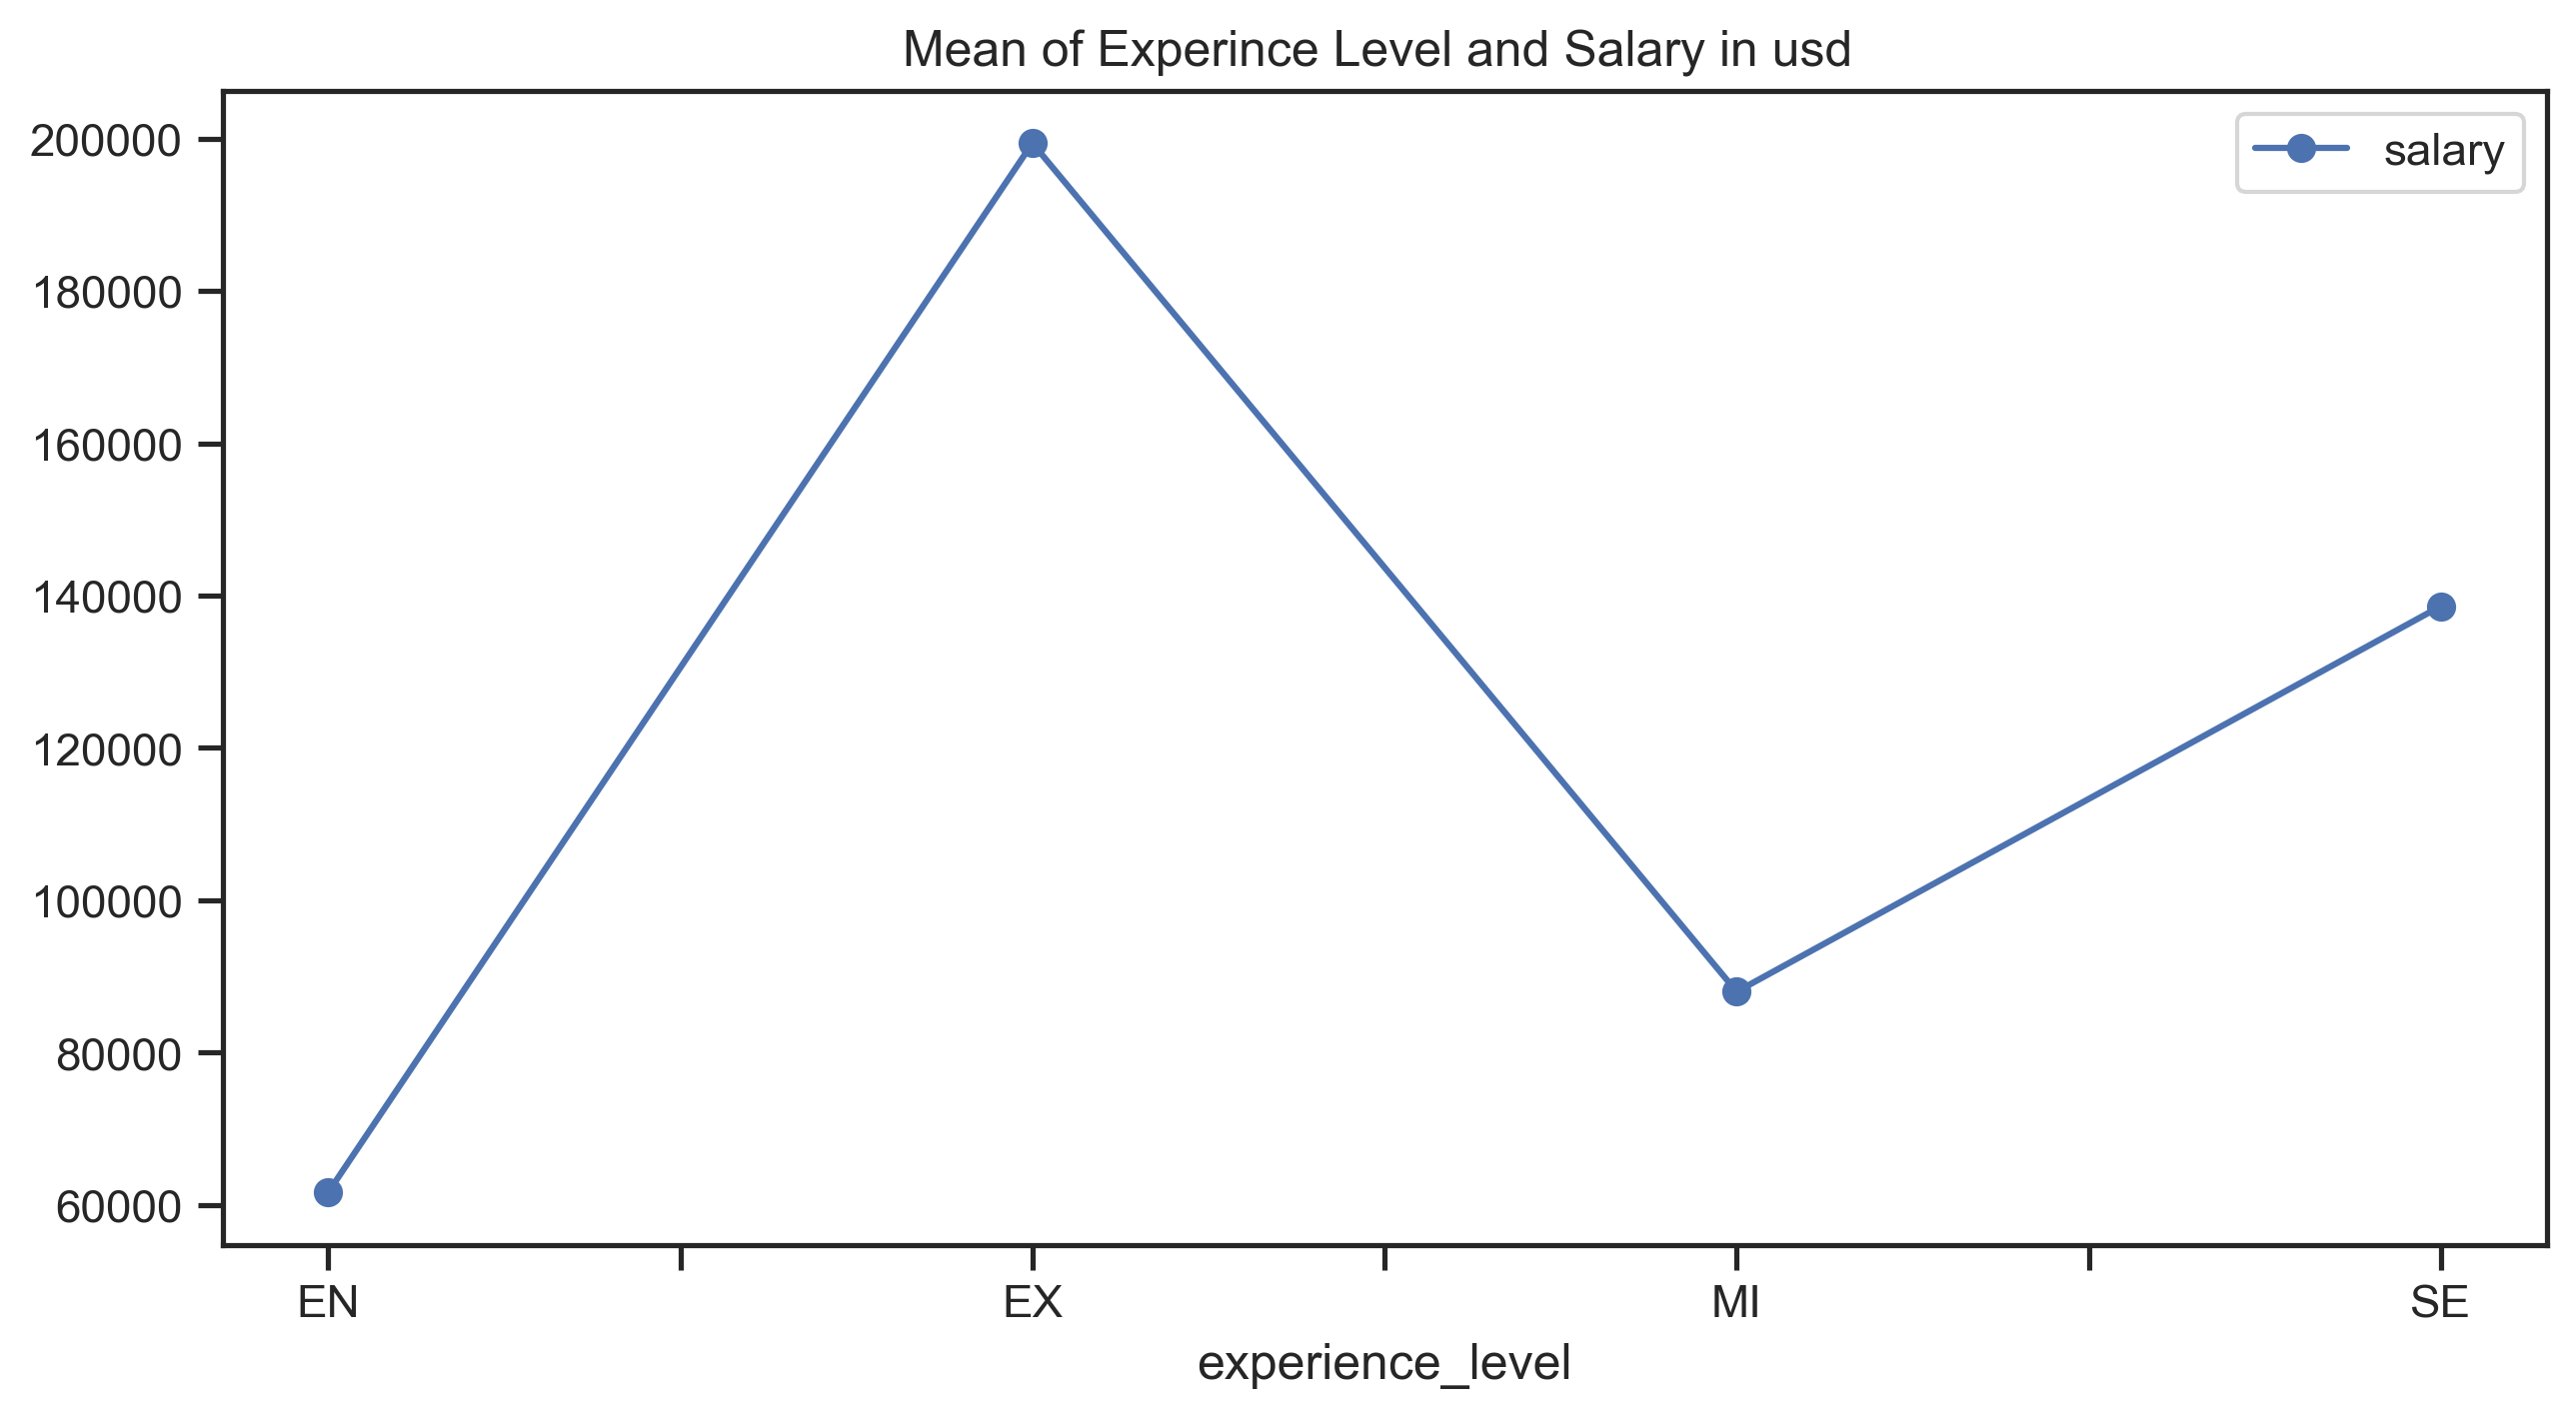

In [ ]:
axis = wages_of_ds.groupby('experience_level')[['salary']].mean().plot(figsize = (10, 5), marker = 'o', color = 'b')
axis.set_title('Mean of Experince Level and Salary in usd ')

Text(0.5, 1.0, 'Mean of Job Title and Salary')

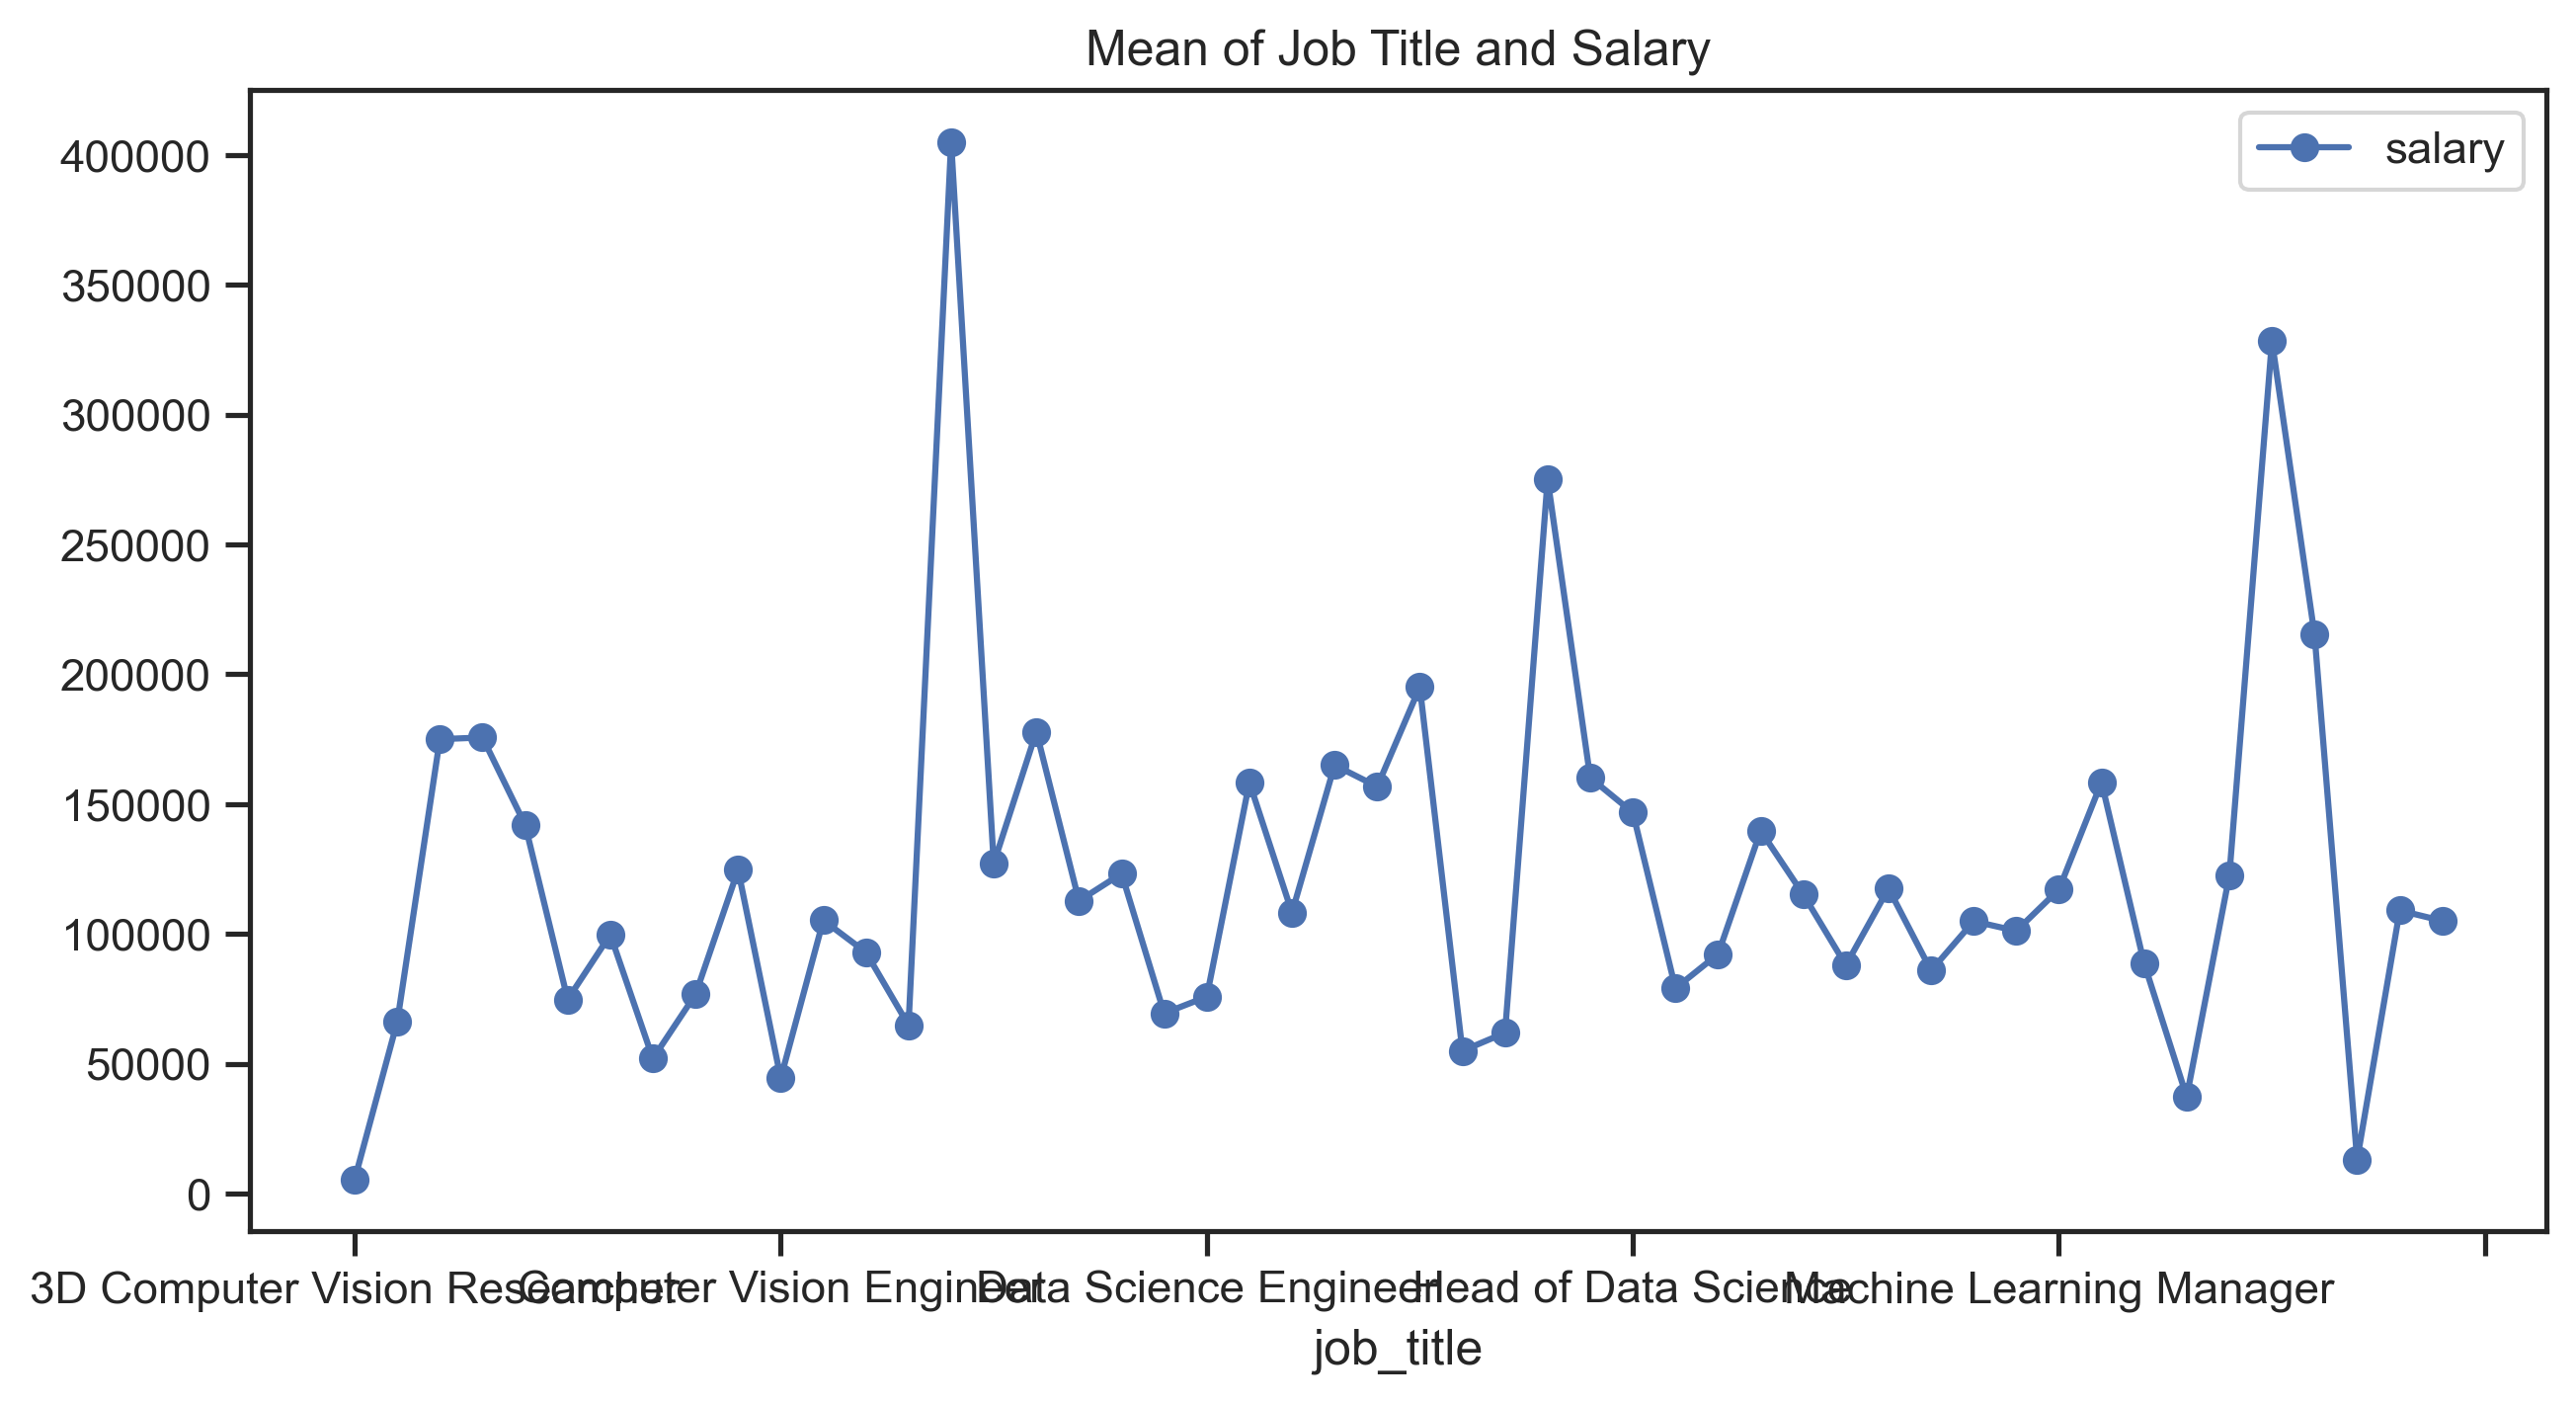

In [ ]:
axis = wages_of_ds.groupby('job_title')[['salary']].mean().plot(figsize = (10, 5), marker = 'o', color = 'b')
axis.set_title('Mean of Job Title and Salary')

In [ ]:
# There are no null values in the dataset; therefore, we can proceed to exploratory data analysis without any extra steps.
wages_of_ds.isna().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
# 5. Exploratory Data Analysis

# Your variable must be defined in the first lines
#def univariate_multi_plot...
# def univariate_single_plot ...
# def univariate_numerical_plot ...



# It´s clearly percievible the quantities of professionals has increased exponentionally in the last couples of years.


def univariate_multi_plot(df=wages_of_ds, x=None, xlabel=None, explode=None):
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))
    sns.countplot(data=df, x=x, ax=ax[0], order=df[x].value_counts(ascending=True).index)
    df[x].value_counts(ascending=True).plot(kind="pie", autopct="%1.1f%%", ax=ax[1], explode=explode)
    sns.despine(bottom=True, left=True)
    ax[0].set_xlabel(xlabel=xlabel, size=12, fontdict=FIG_FONT)
    ax[0].set_ylabel(ylabel="")
    ax[1].set_ylabel(ylabel="")
    ax[0].bar_label(ax[0].containers[0], label_type='edge', size=12, padding=1, fontname="Helvetica, Ariel",
                    color="#7f7f7f")
    fig.text(0.5, 1, f'{xlabel} Distribution', size=16, fontdict=FIG_FONT, ha="center", va="center")
    plt.show()


def univariate_single_plot(df=wages_of_ds, x=None, xlabel=None, rotation=None, bar_label=False):
    fig, ax = plt.subplots(1, 1, figsize=(20, 7))
    sns.countplot(data=df, x=x, order=df[x].value_counts(ascending=True).index)
    sns.despine(bottom=True, left=True)
    plt.xlabel(xlabel=xlabel, size=14, fontdict=FIG_FONT)
    plt.xticks(rotation=rotation)
    plt.ylabel(ylabel="")
    if bar_label:
        ax.bar_label(ax.containers[0], label_type='edge', size=10, padding=1, fontname="Helvetica, Ariel",
                        color="#7f7f7f")
    plt.title(label=f'{xlabel} Distribution', size=18, fontdict=FIG_FONT)
    plt.show()


def univariate_numerical_plot(df=wages_of_ds, x=None, xlabel=None, bar_label=True):
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))
    sns.histplot(data=df, x=x, kde=True, ax=ax[0])
    sns.boxplot(data=df, x=x, ax=ax[1])
    sns.despine(bottom=True, left=True)
    ax[0].set_xlabel(xlabel=xlabel, size=12, fontdict=FIG_FONT)
    ax[1].set_xlabel(xlabel=xlabel, size=12, fontdict=FIG_FONT)
    ax[0].set_ylabel(ylabel="")
    ax[1].set_ylabel(ylabel="")
    fig.text(0.5, 1, f'{xlabel} Distribution', size=16, fontdict=FIG_FONT, ha="center", va="center")
    plt.show()



In [ ]:
# for interpretability in graphs
wages_of_ds["experience_level"].replace(["EN", "MI", "SE", "EX"], ["Junior", "Mid", "Senior", "Expert"], inplace=True)
wages_of_ds["remote_ratio"].replace([0, 50, 100], ["On-site", "Hybrid", "Remote"], inplace=True)
wages_of_ds["employment_type"].replace(["PT", "FT", "CT", "FL"], ["Part-time", "Full-time", "Contract", "Freelance"], inplace=True)
wages_of_ds["company_size"].replace(["S", "M", "L"], ["Small", "Medium", "Large"], inplace=True)

findfont: Font family ['Helvetica, Ariel'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica, Ariel'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica, Ariel'] not found. Falling back to DejaVu Sans.


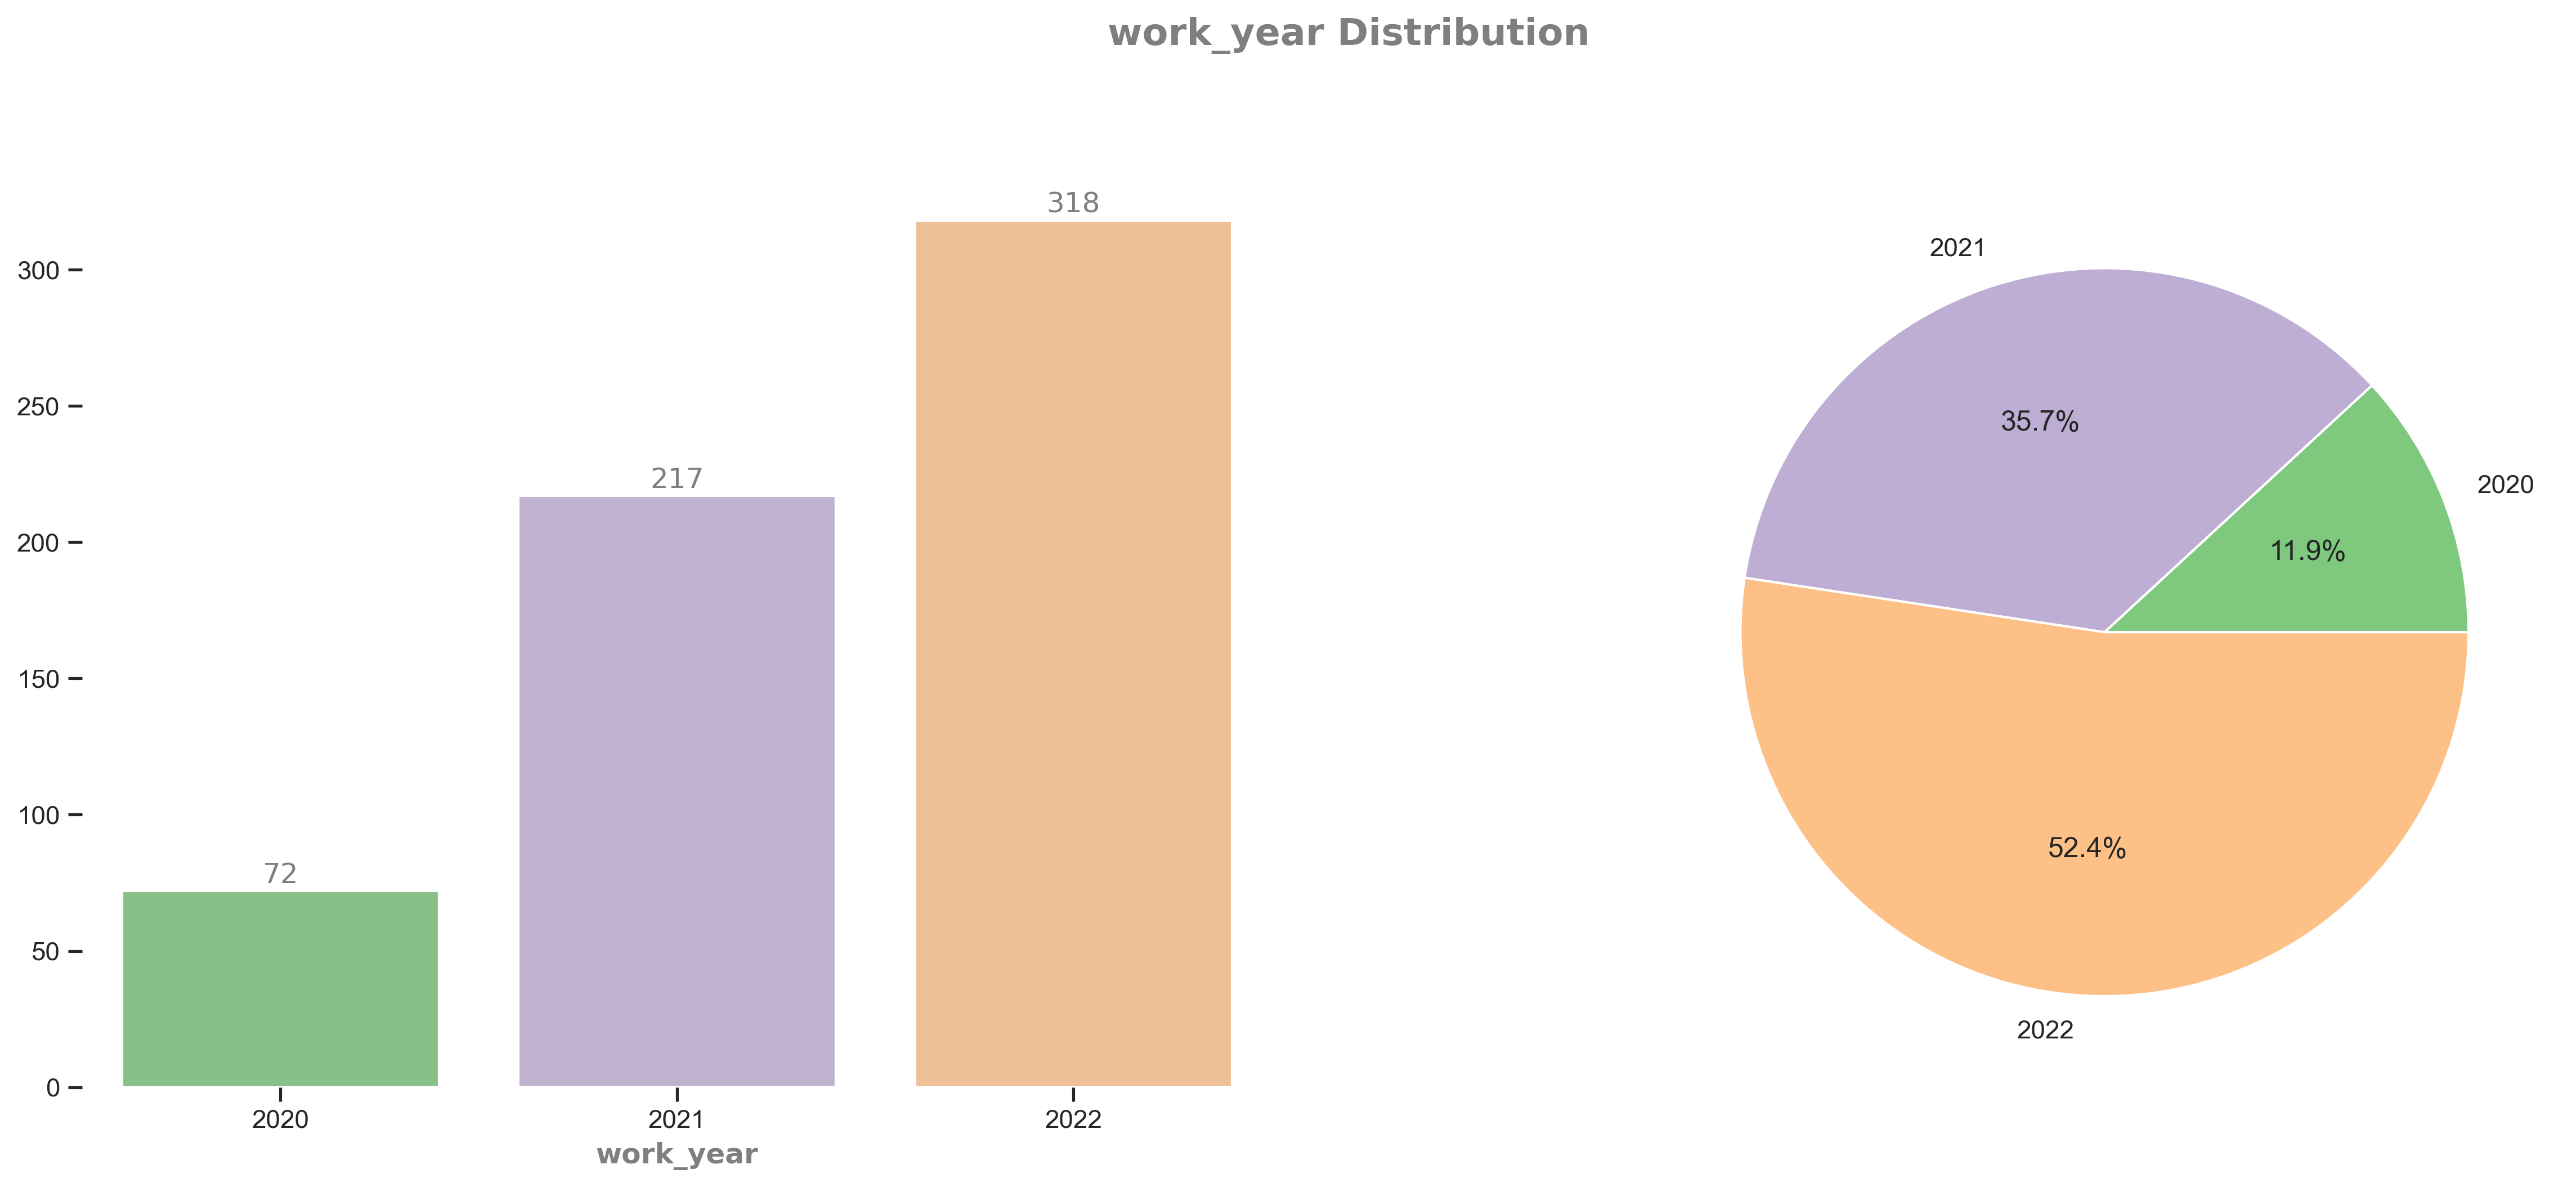

In [ ]:
univariate_multi_plot(x='work_year', xlabel='work_year');

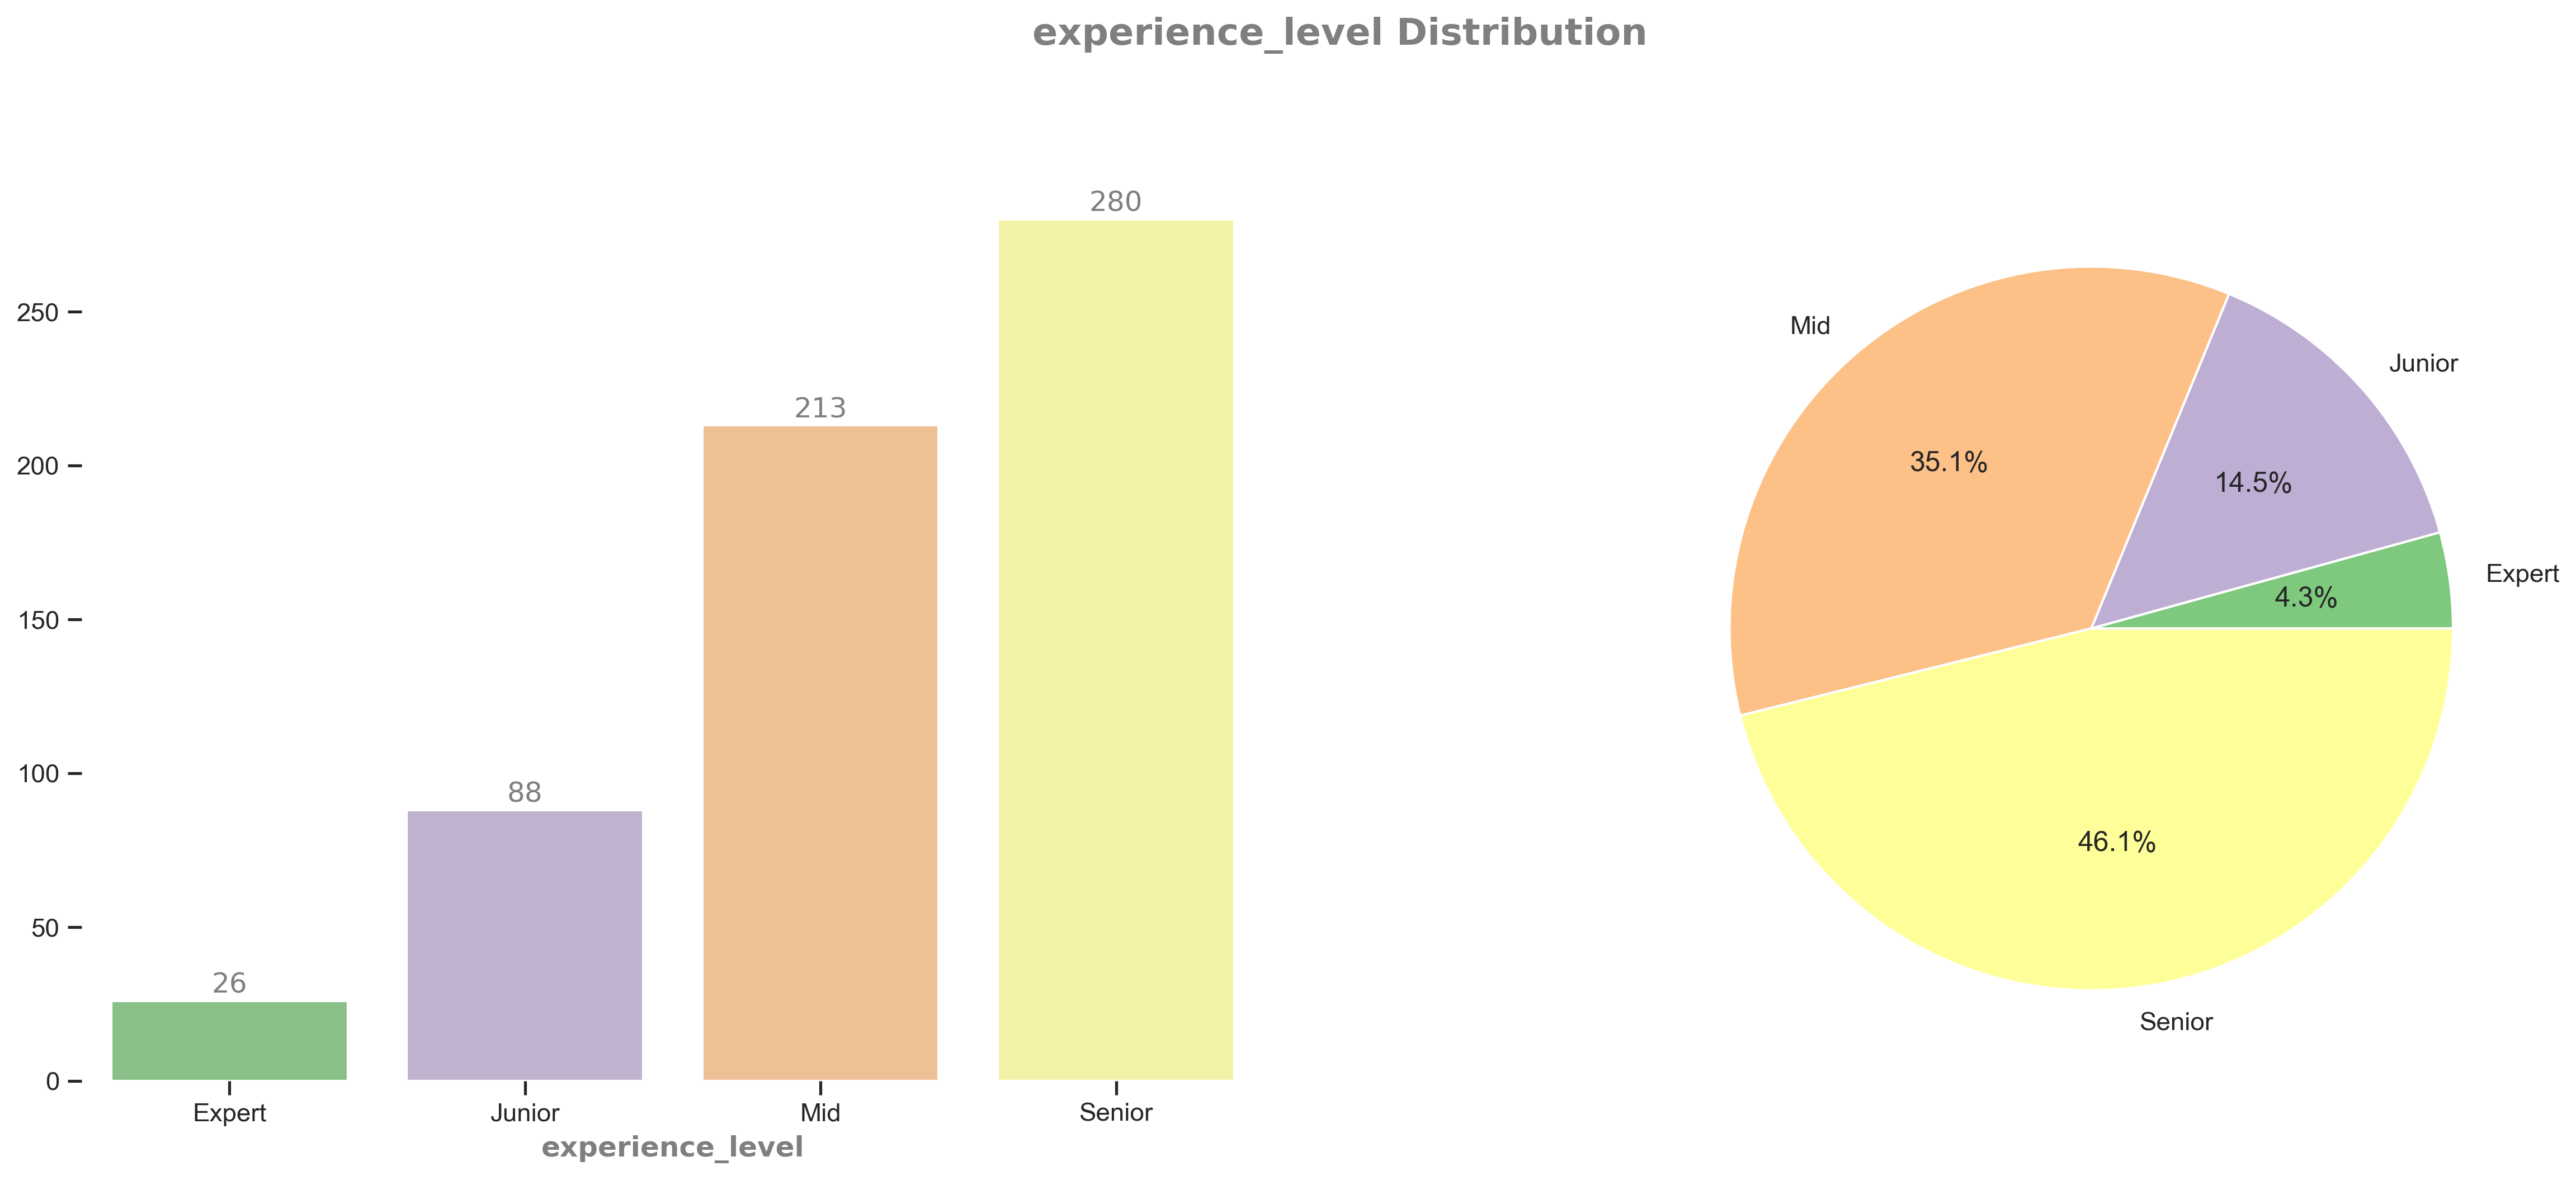

In [ ]:
univariate_multi_plot(x="experience_level", xlabel="experience_level")

# The numbers of Seniors are higher than the others level of professional.
# This level of professional is tremendously important for the company because their mastery comprehend the knowledge
# of a Data analyst to Data Engeneering.
# In the other hand, if the company does not have the budget for hiring a Senior, certainly a data scientist
# might be their type that they want to.

# Thinking over the junior also is highly essential, because, at once they were assisted and mentored, probably
# they might be excellent professional.



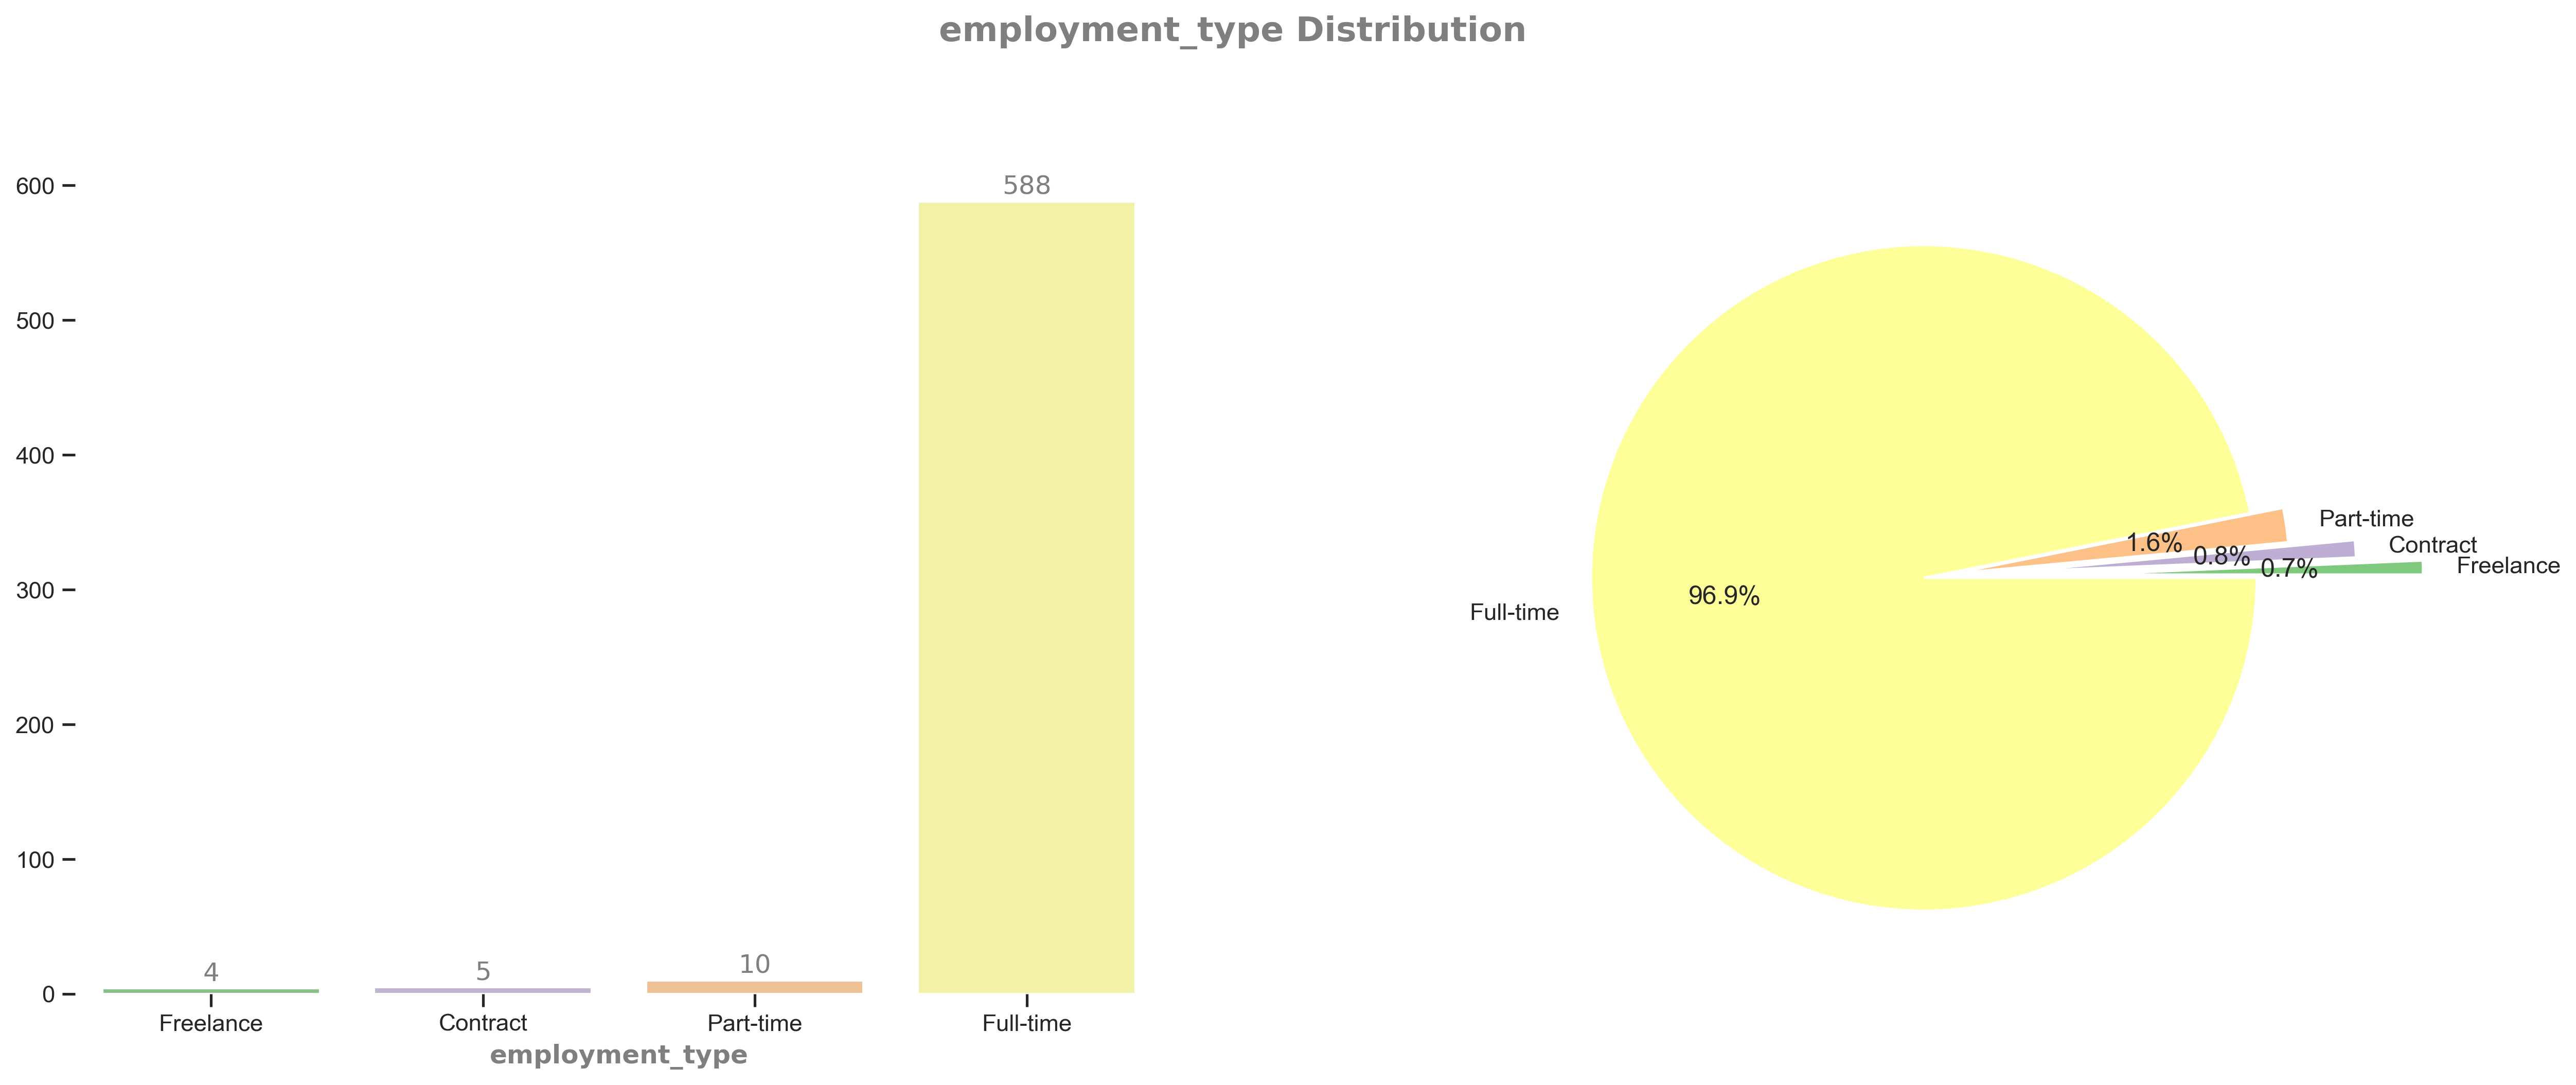

In [ ]:
univariate_multi_plot(x="employment_type", xlabel="employment_type", explode=(0.5, 0.3, 0.1, 0))

# 96,9% professionals have full-time job. As these kind of professionals are highly qualified thinking as manager or
# company offering full-time job is excellent because it provides a better background  for the professionals

findfont: Font family ['Helvetica, Ariel'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica, Ariel'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica, Ariel'] not found. Falling back to DejaVu Sans.


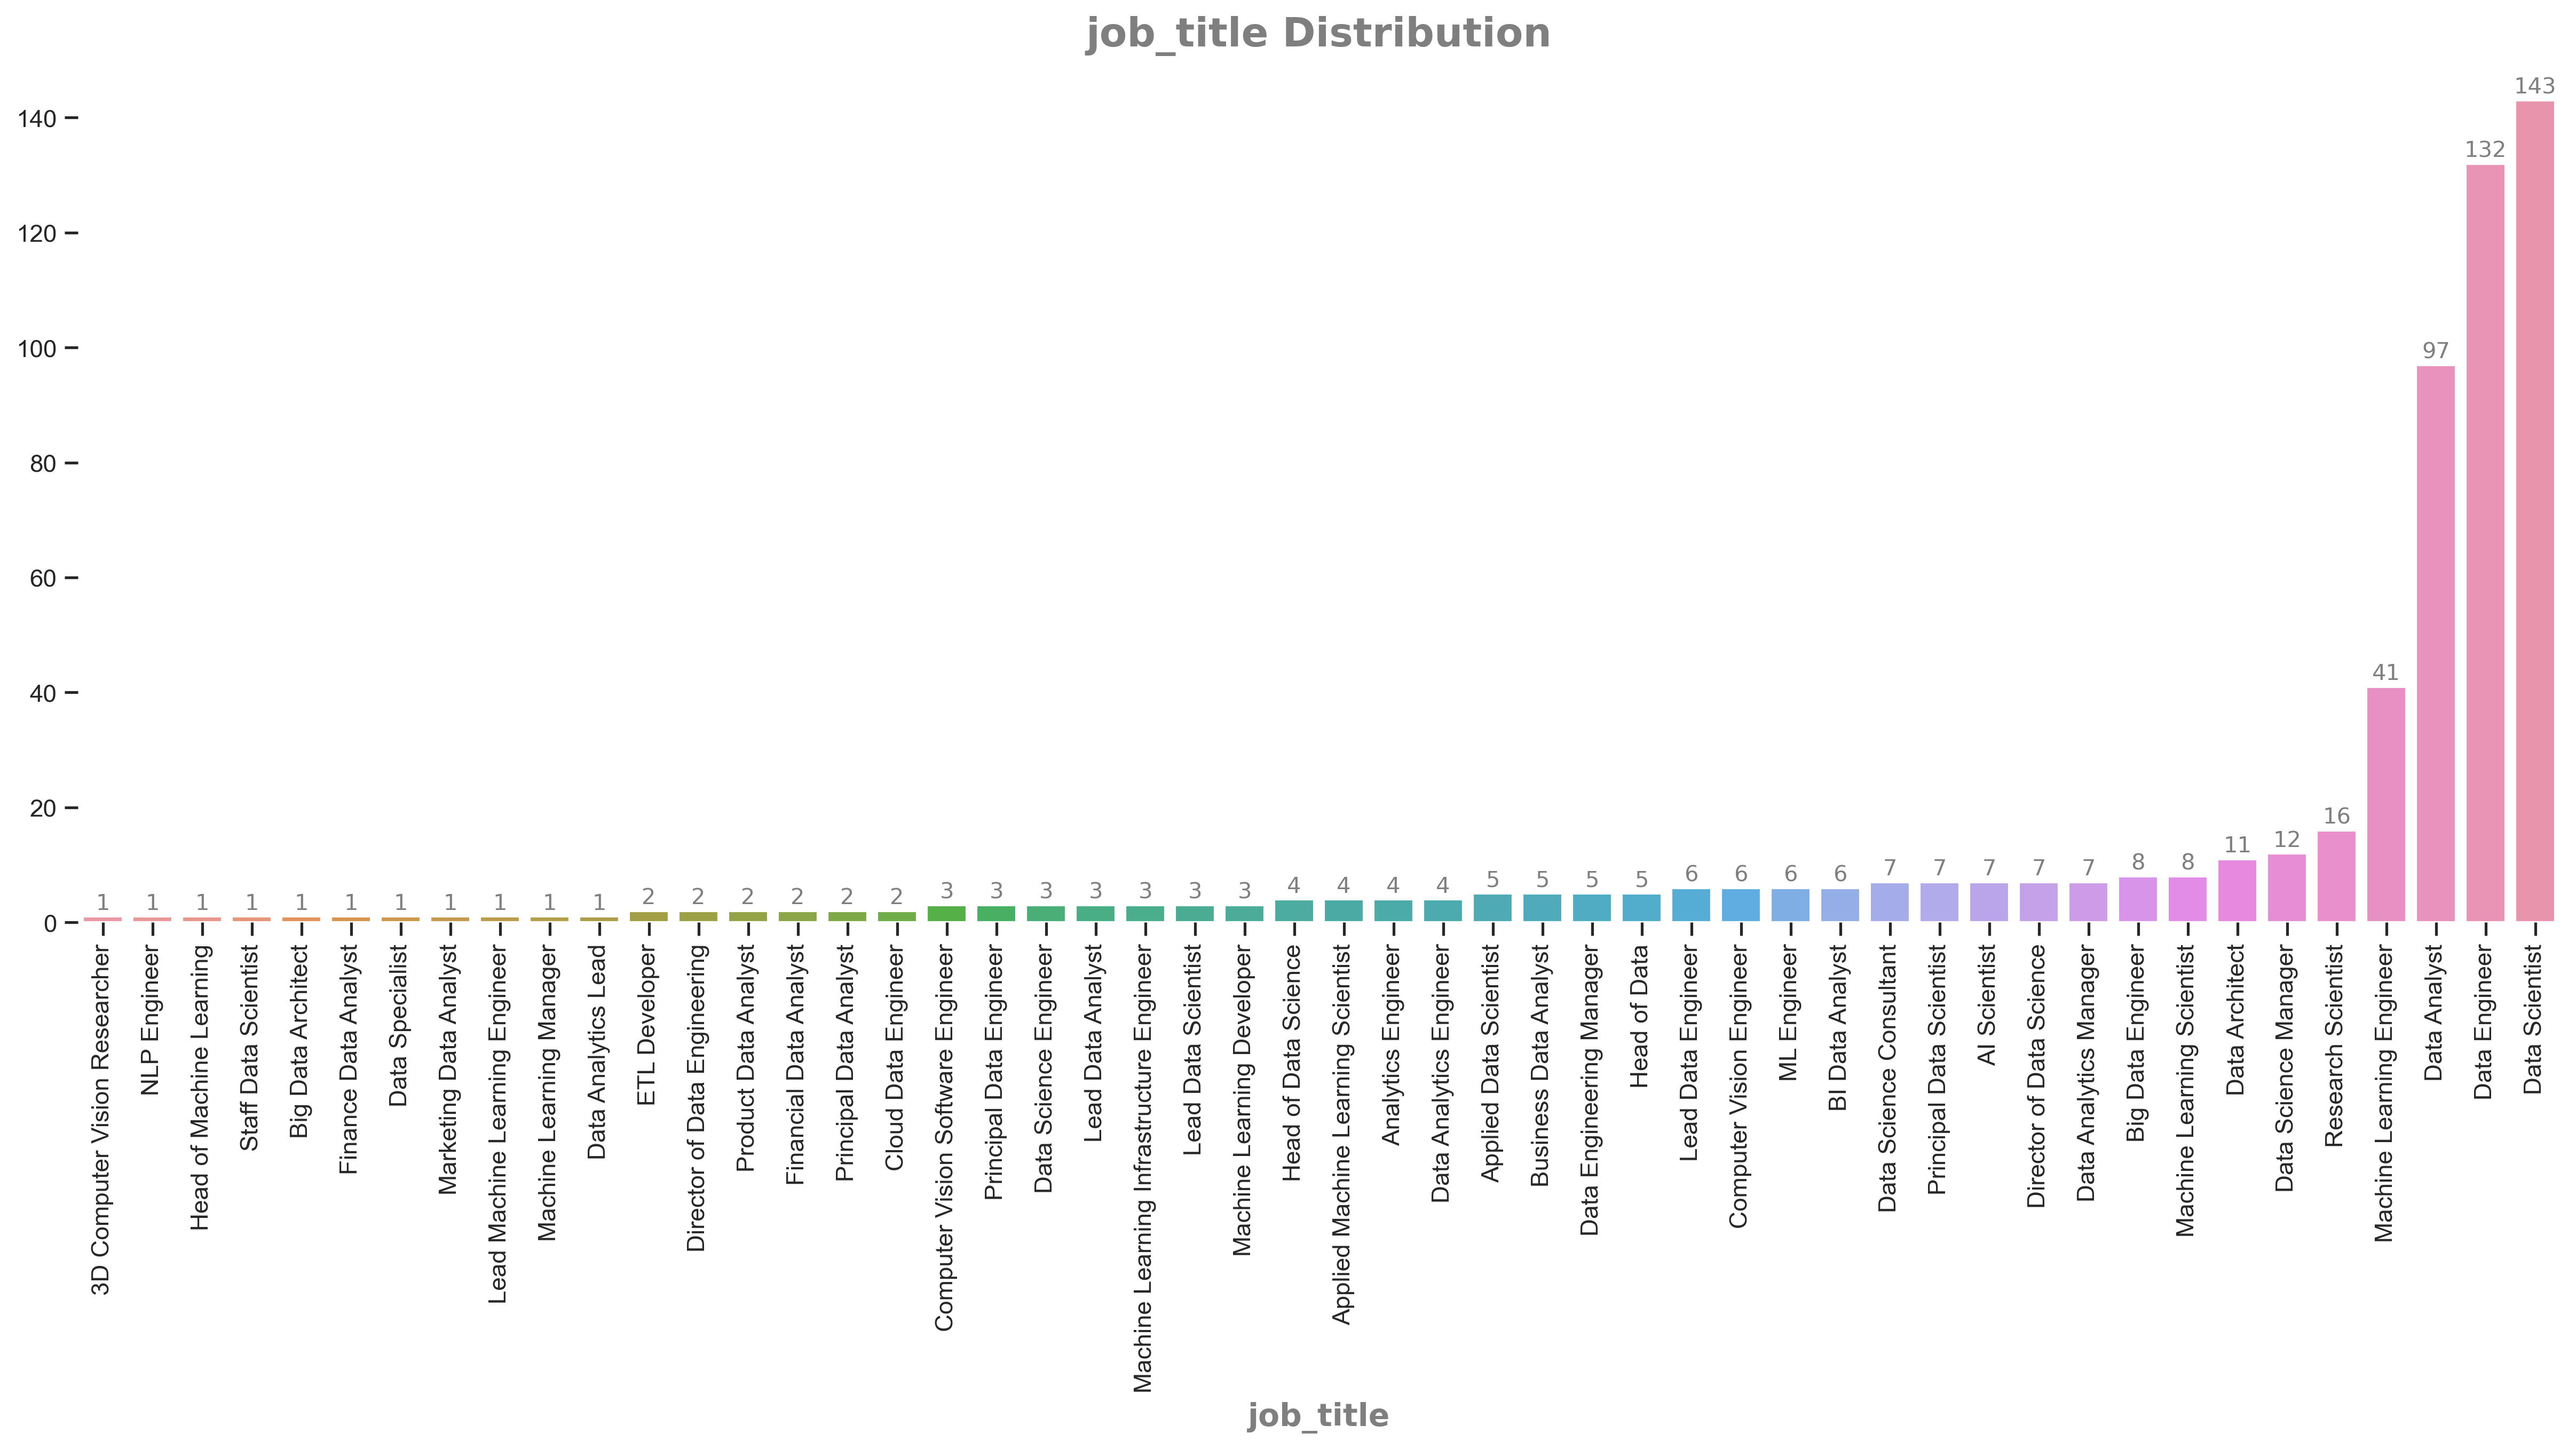

In [ ]:
# 5.1.4 Job Title
univariate_single_plot(x="job_title", xlabel="job_title", rotation=90, bar_label=True);


# Number of Data Scientist and Data Engineer salary data are highest in the dataset.
# Data Analyst takes the third place.
# Machine Learning Engineer is the last significant title with approximately 40 entries.
# Possible Conclusion: Job market is mostly dominated by Data Scientists, Data Engineers, Data Analysts, and Machine Learning Engineers.

# I would like to bring this insght for many many companies that data are assets for a lot of interprises for
# all of the world and interpret them might booster their buniness.

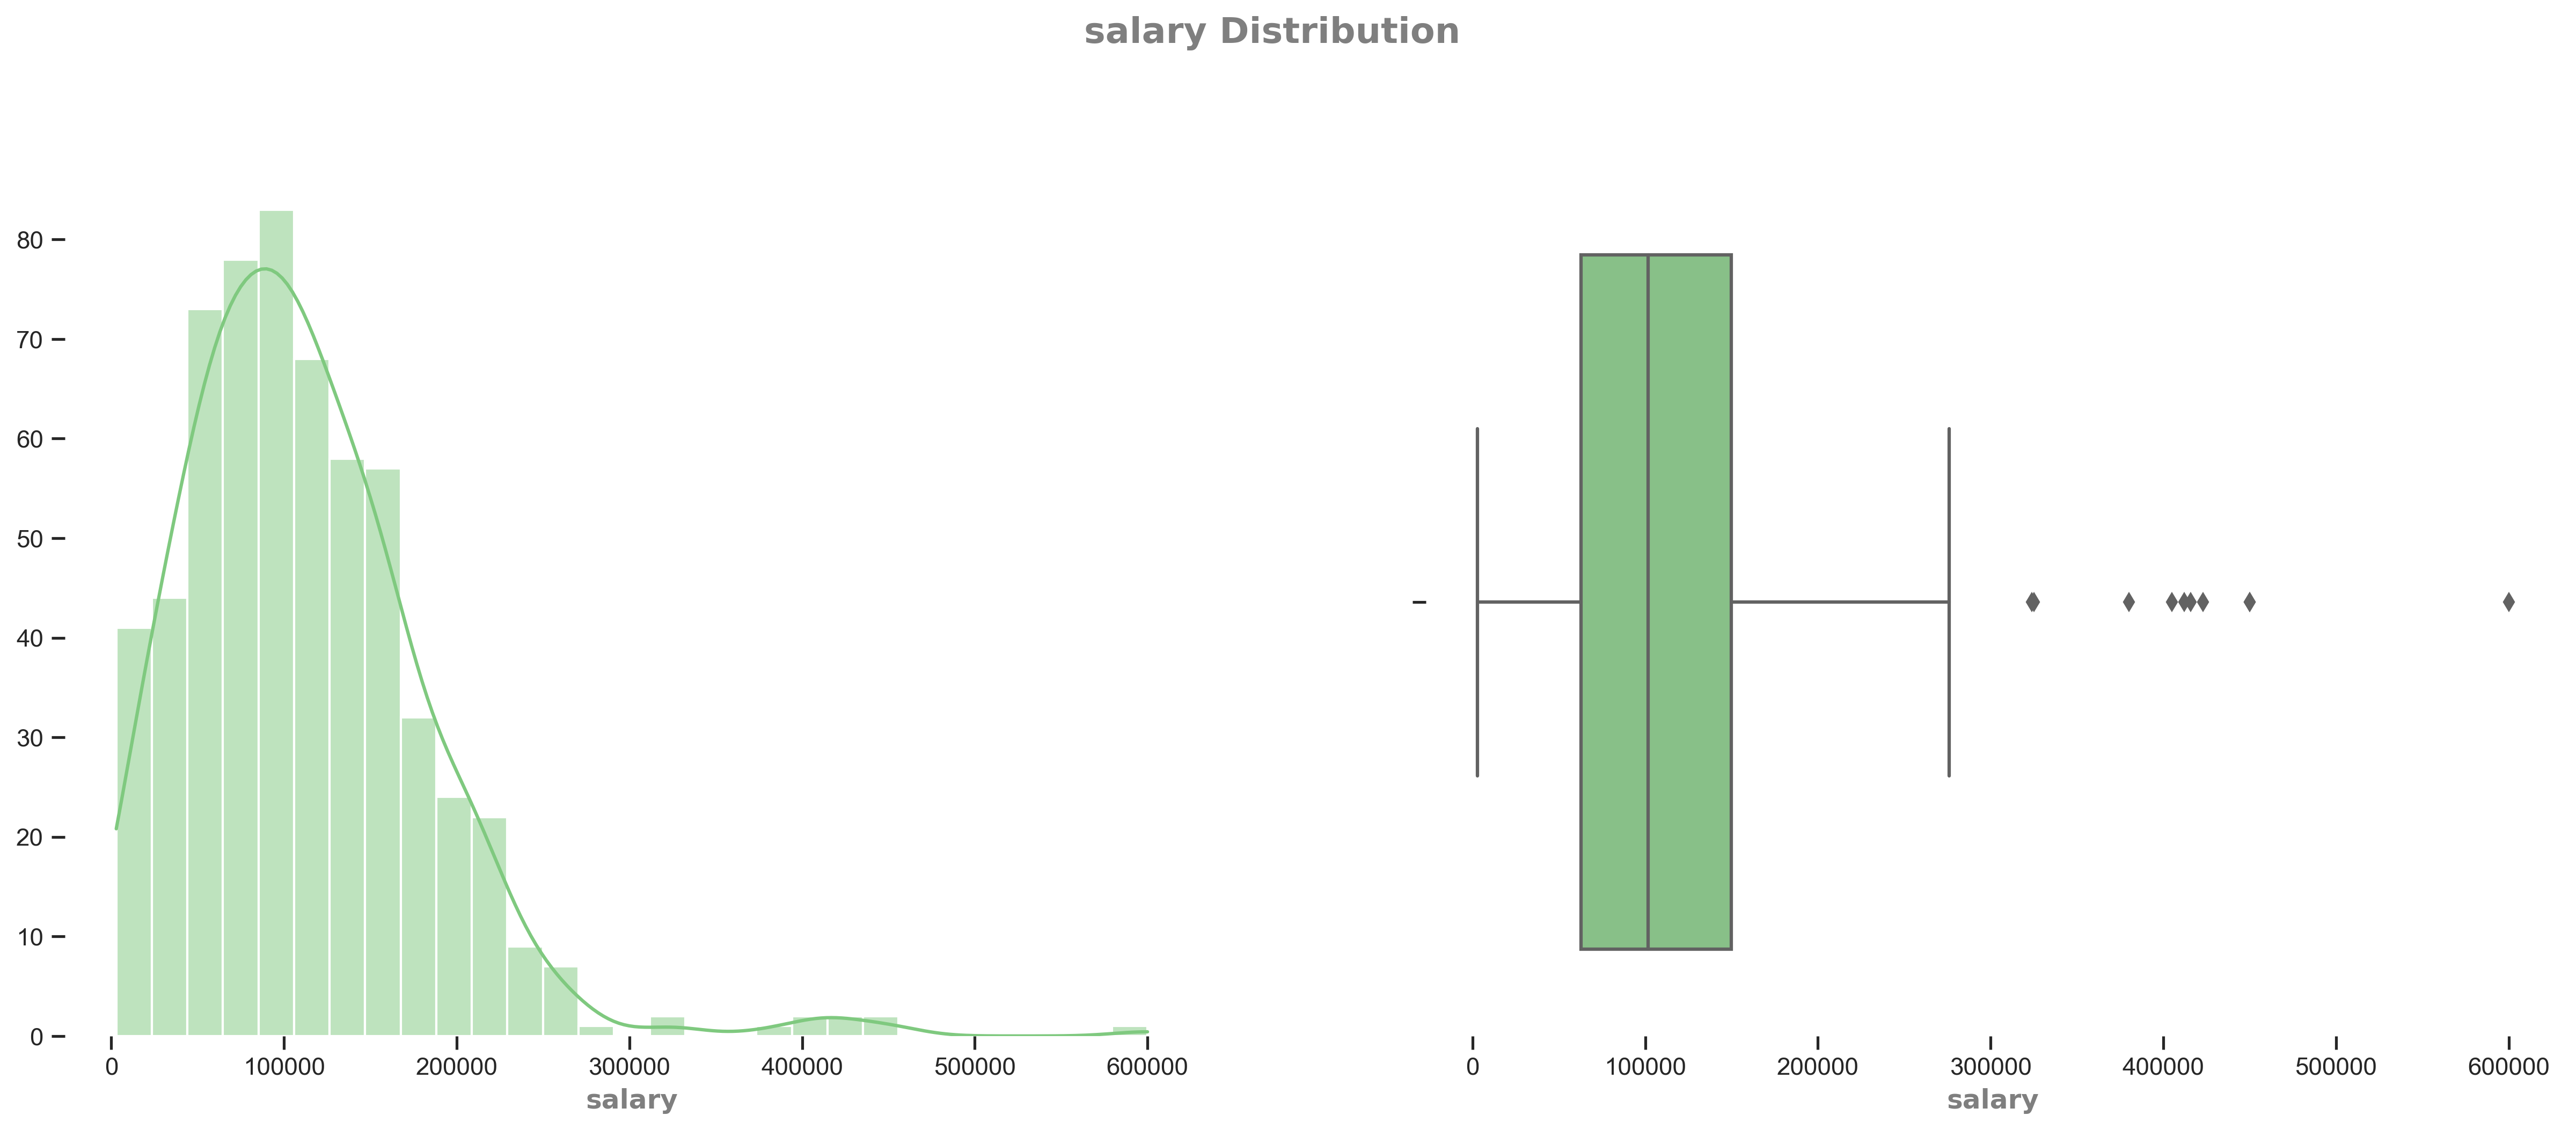

In [ ]:
univariate_numerical_plot(x="salary", xlabel="salary")


# By looking at the curve, we can say that most of the employees are getting paid around 100,000 USD.
# Higher salaries are quite rare, especially over 300,000 USD.
#I would like to look into the employees who earn more than 300,000 USD.

# The outliers that have the most high salaries might be directors of the companies that
# differs from the standard of the level of salaries of the field - (Paulo Cesar da Silva)

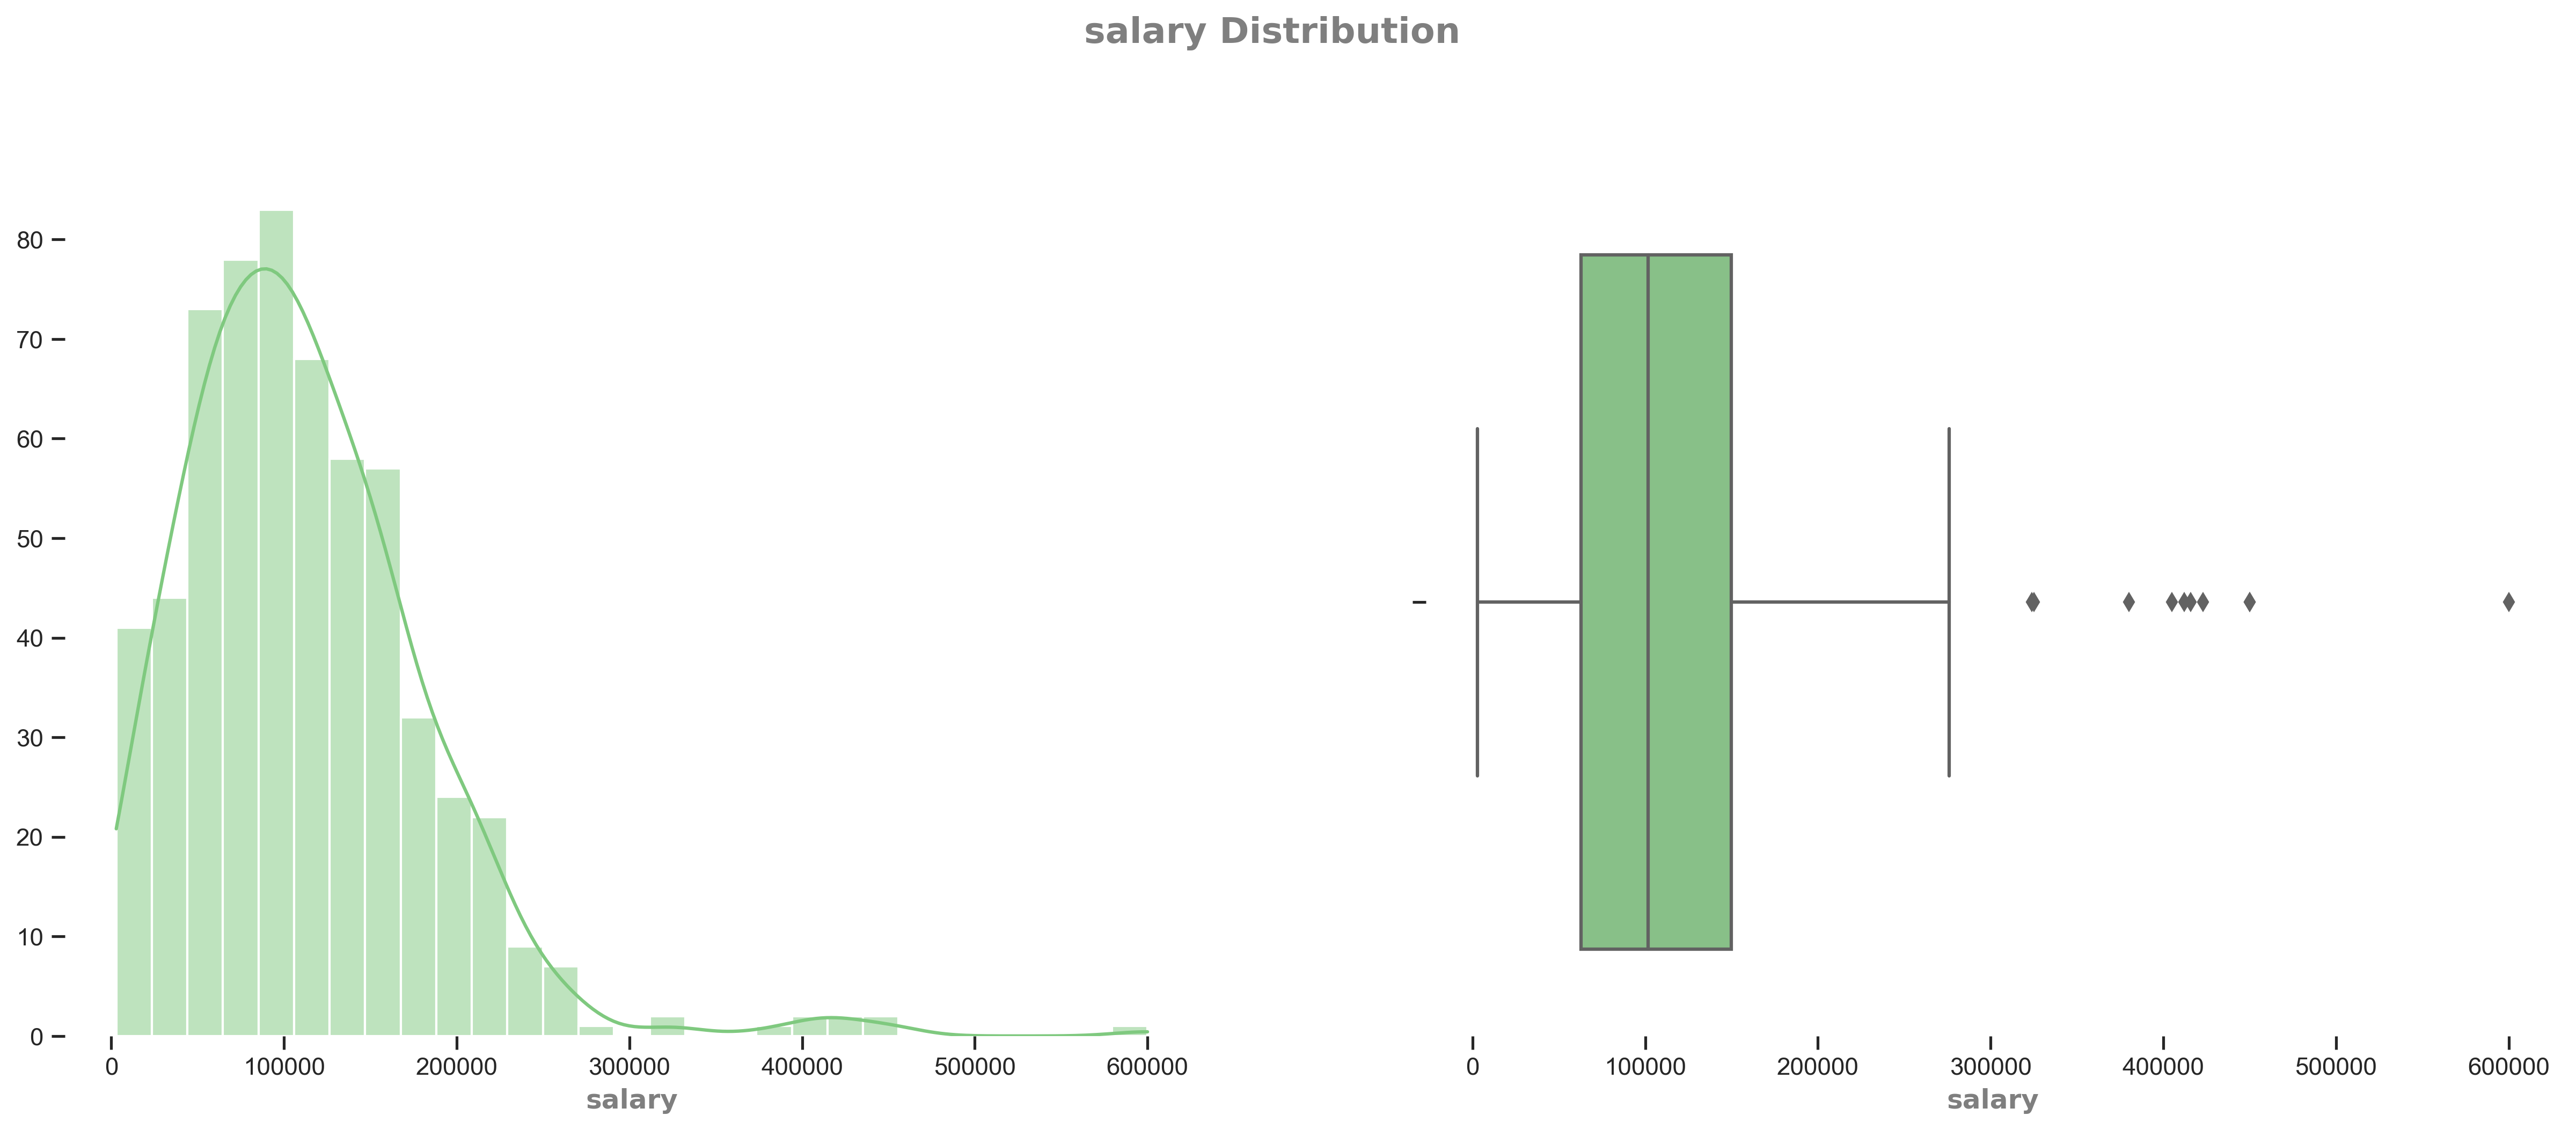

In [ ]:
univariate_numerical_plot(x="salary", xlabel="salary");

# Statistical data about the salary
# 25 quartile means 5000.00 usd
# 50 quartile means the amount 10000.00
# 75 quartile means the importance of 15000.00
# the points out of the box may be the professional that have status of directors

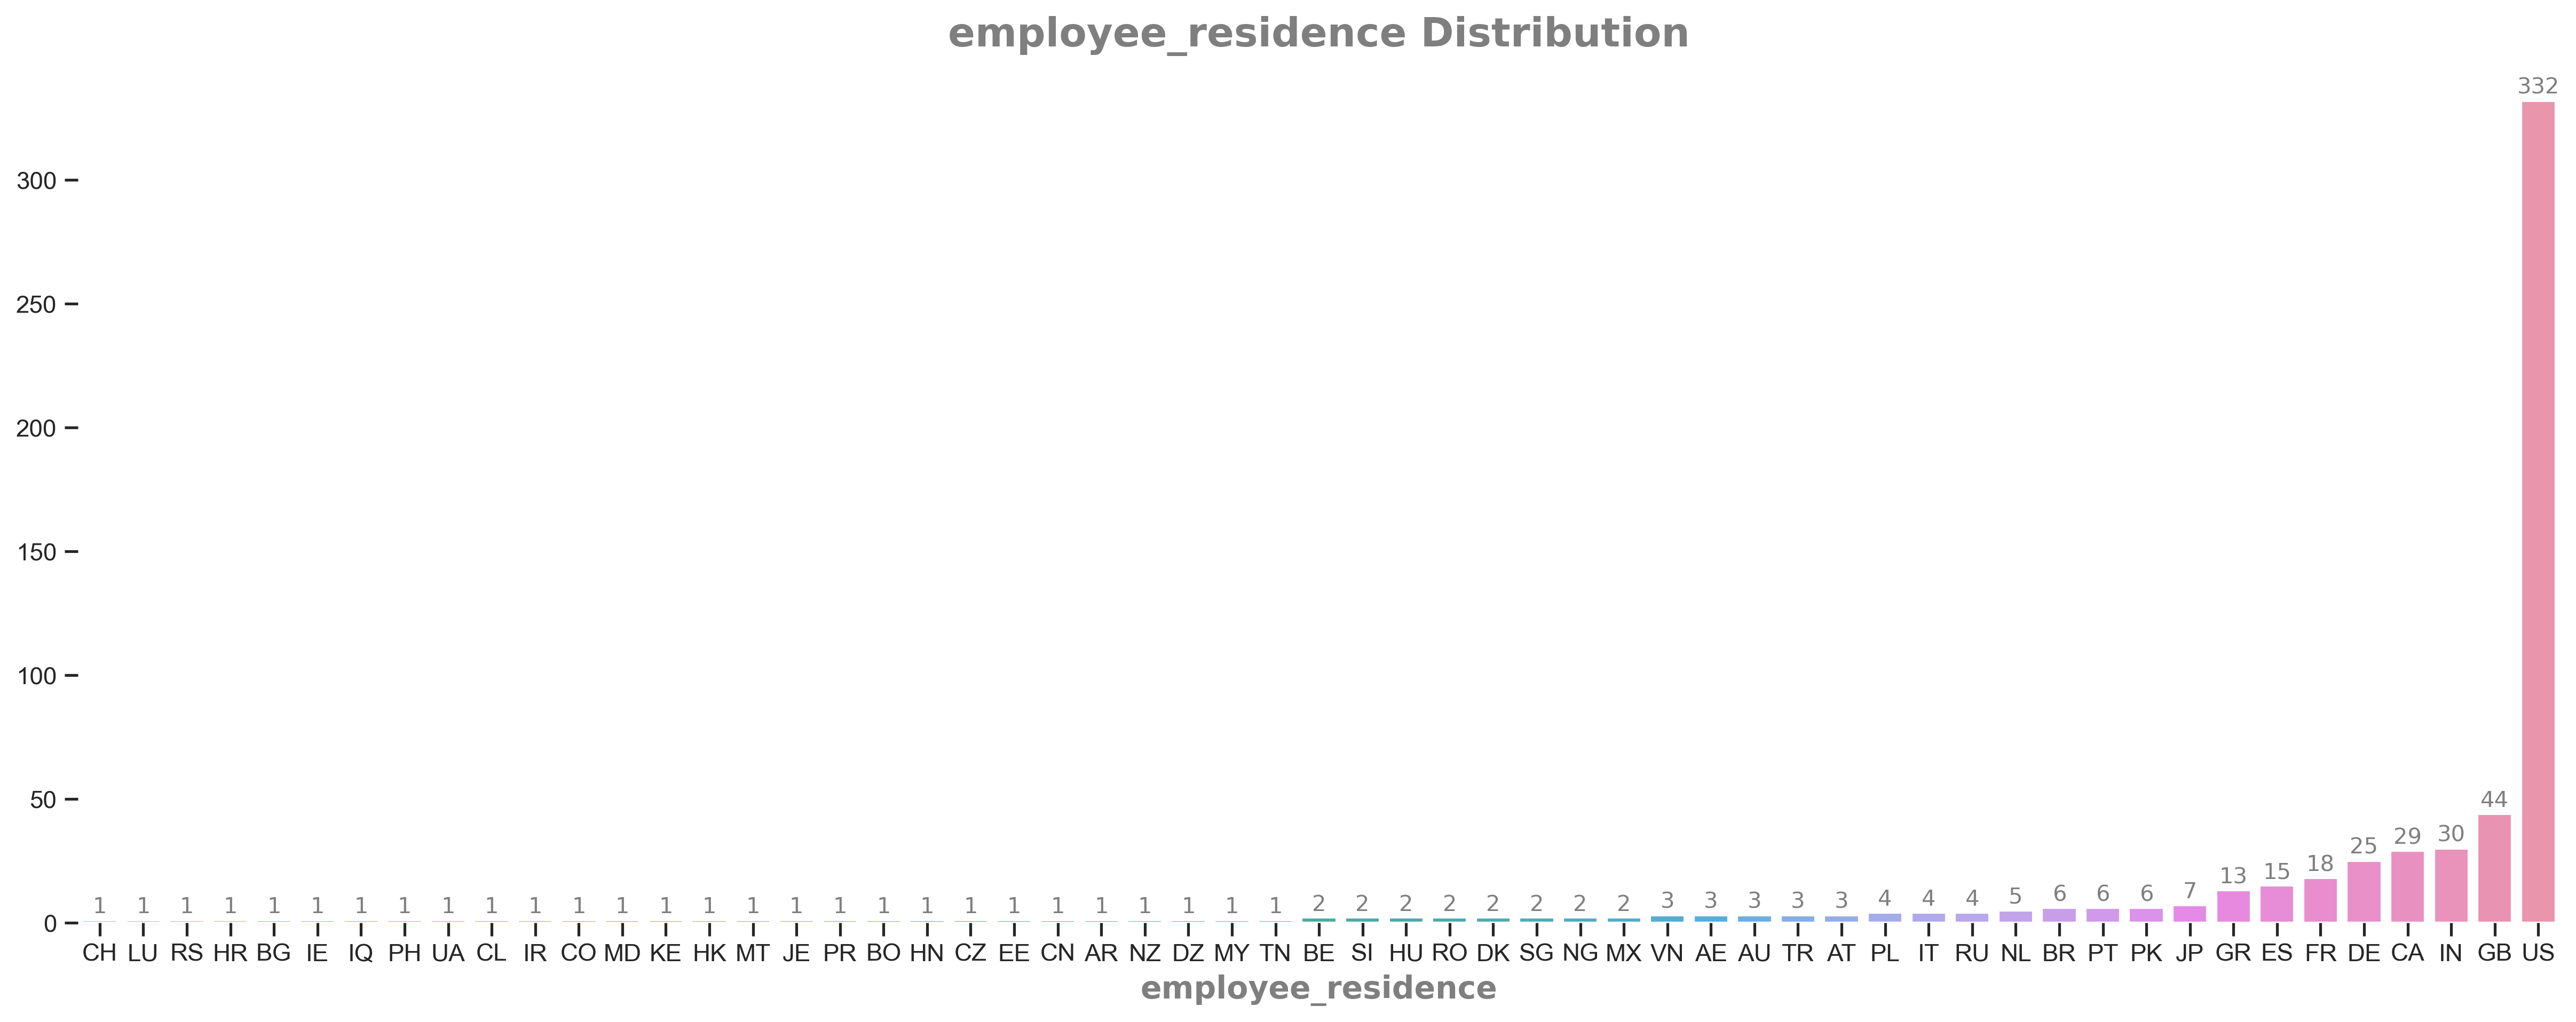

In [ ]:
# Employee Residence
univariate_single_plot(x="employee_residence", xlabel="employee_residence", bar_label=True);


# The United States clearly dominates the competition with over 300 data entries.
# Great Britain, Canada, India, and Germany follows the United States, with less than 50 entries.
# Most of the countries are next to zero.
# Possible Conclusion: Data science jobs are much more popular and common in the United States than in any other country.

In [ ]:
## Helper Functions

def multivariate_plot(df=wages_of_ds, x=None, hue=None, xlabel=None, rotation=None, bar_label=True,
                      legend=False, rotate_label=False):
    fig, ax = plt.subplots(1, 1, figsize=(20, 7))
    df = df.groupby(x).mean()["salary"].sort_values().reset_index().copy()
    sns.barplot(data=df, x=x, y="salary", hue=hue, ci=None)
    plt.ylabel(ylabel="Salary (in USD)", size=12, fontdict=FIG_FONT)
    plt.xlabel(xlabel=xlabel, size=12, fontdict=FIG_FONT)
    plt.title(label=f'Salaries by {xlabel}', size=16, fontdict=FIG_FONT)
    plt.xticks(rotation=rotation)
    if legend:
        plt.legend()
    if bar_label and rotate_label:
        ax.bar_label(ax.containers[0], label_type='edge', size=10, padding=3, fontname="Helvetica, Ariel",
                    color="#7f7f7f", rotation="vertical")
    elif bar_label and not rotate_label:
        ax.bar_label(ax.containers[0], label_type='edge', size=12, padding=1, fontname="Helvetica, Ariel",
                    color="#7f7f7f")
    sns.despine(bottom=True, left=True)
    plt.show()


def multivariate_count_plot(df=wages_of_ds, x=None, hue=None, xlabel=None, hue_label=None, rotation=None,
                            legend=False, bar_label=False, convert=False):
    fig ,ax = plt.subplots(1, 1, figsize=(20, 7))
    sns.countplot(data=df, x=x, hue=hue)
    plt.ylabel(ylabel="", size=12, fontdict=FIG_FONT)
    plt.xlabel(xlabel=xlabel, size=12, fontdict=FIG_FONT)
    plt.title(label=f'{hue_label} vs. {xlabel}', size=16, fontdict=FIG_FONT)
    plt.xticks(rotation=rotation)
    if bar_label:
        for i in range(df[hue].nunique()):
            ax.bar_label(ax.containers[i], label_type='edge', size=10, padding=1, fontname="Helvetica, Ariel",
                    color="#7f7f7f")
    if legend:
        if convert:
            country_labels = coco.CountryConverter().convert(df[hue].unique(), to='name_short')
            plt.legend(title=hue_label, labels=country_labels)
        else:
            plt.legend(title=hue_label)
    sns.despine(bottom=True, left=True)
    plt.show()

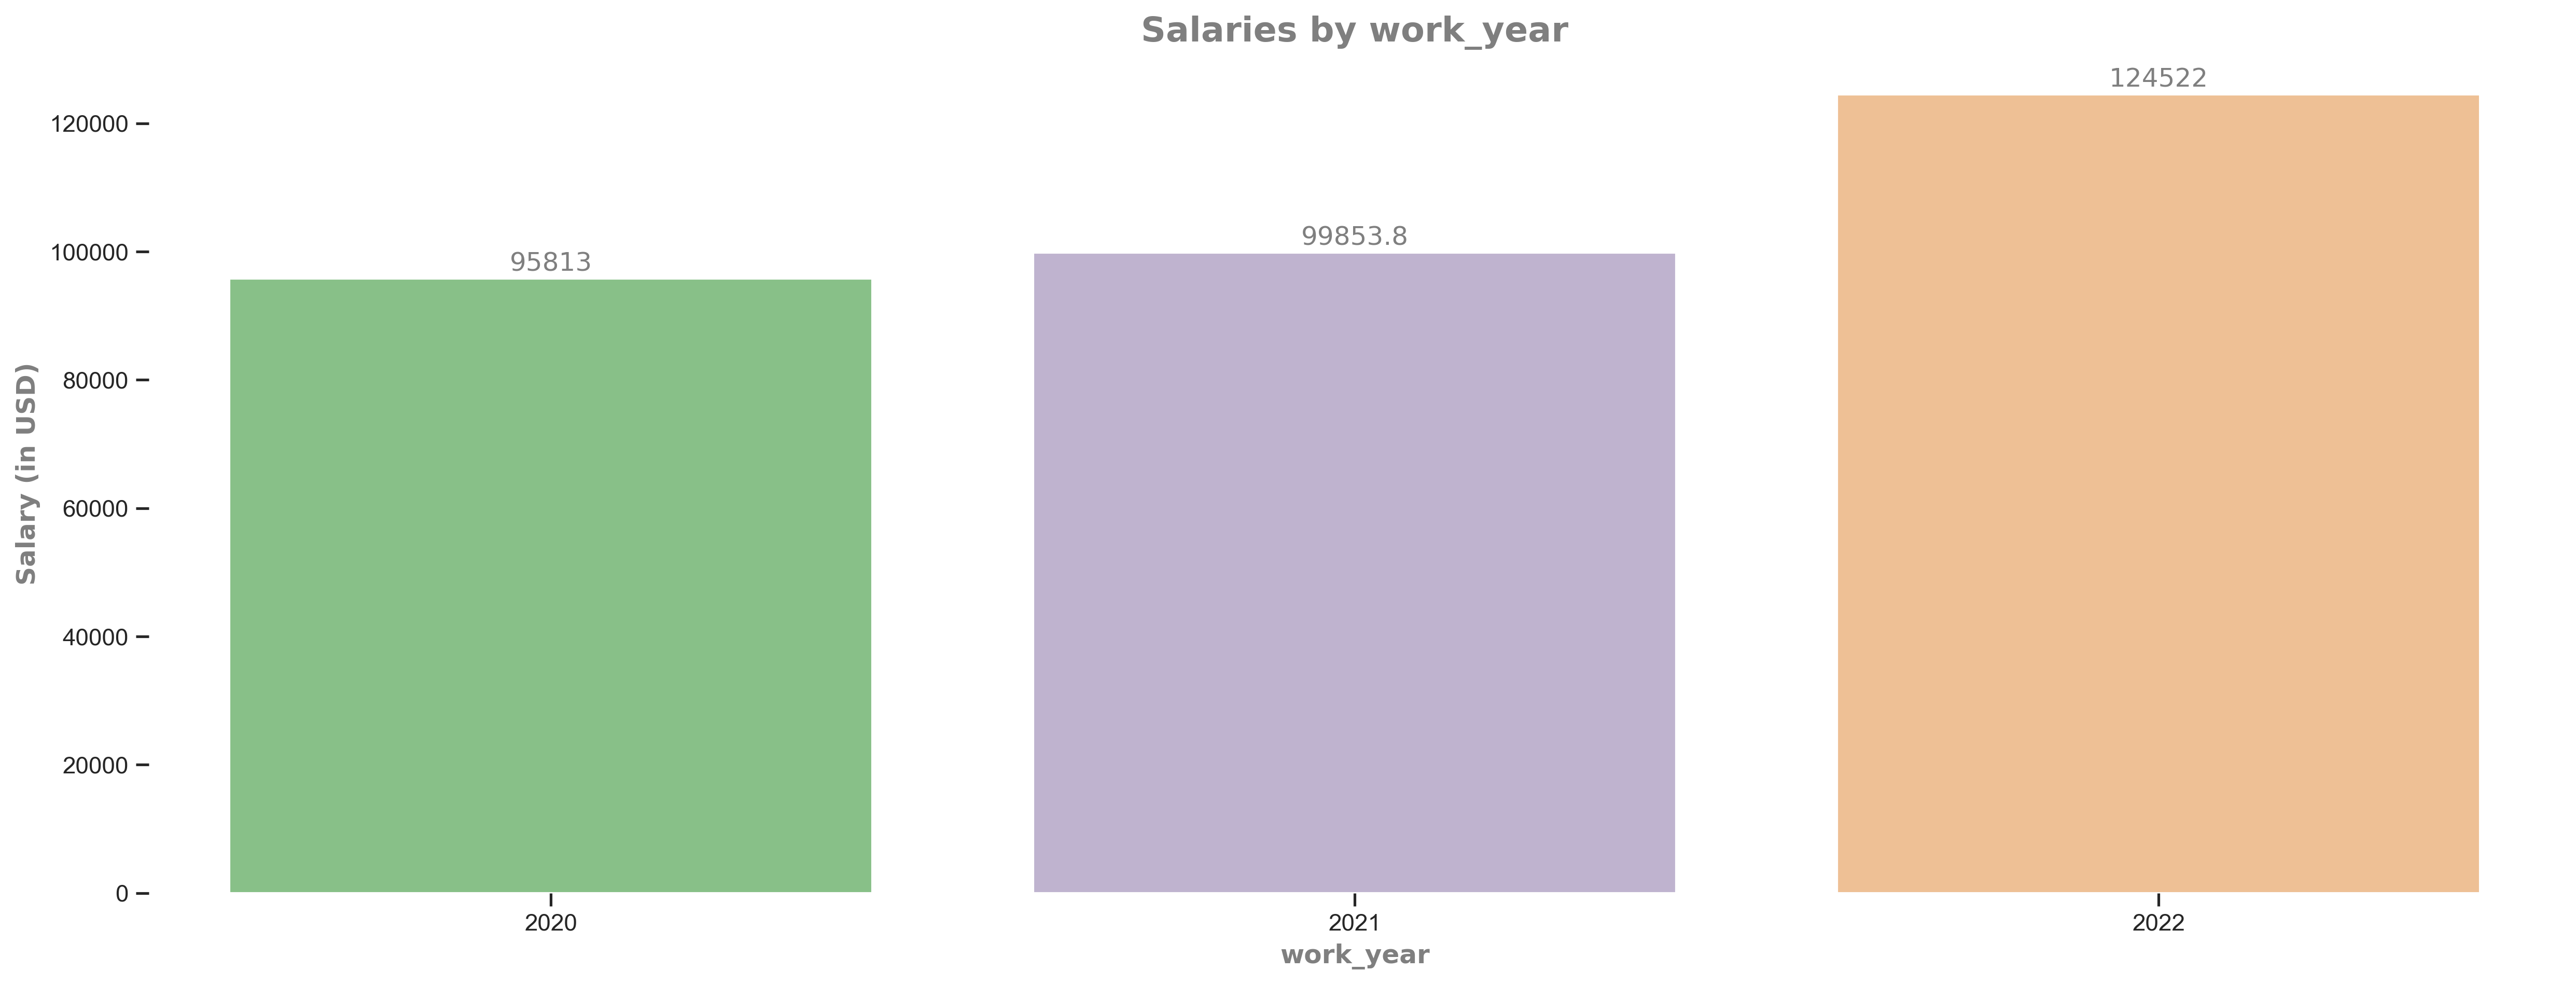

In [ ]:
# Work Year and Salary

multivariate_plot(x="work_year", xlabel="work_year");

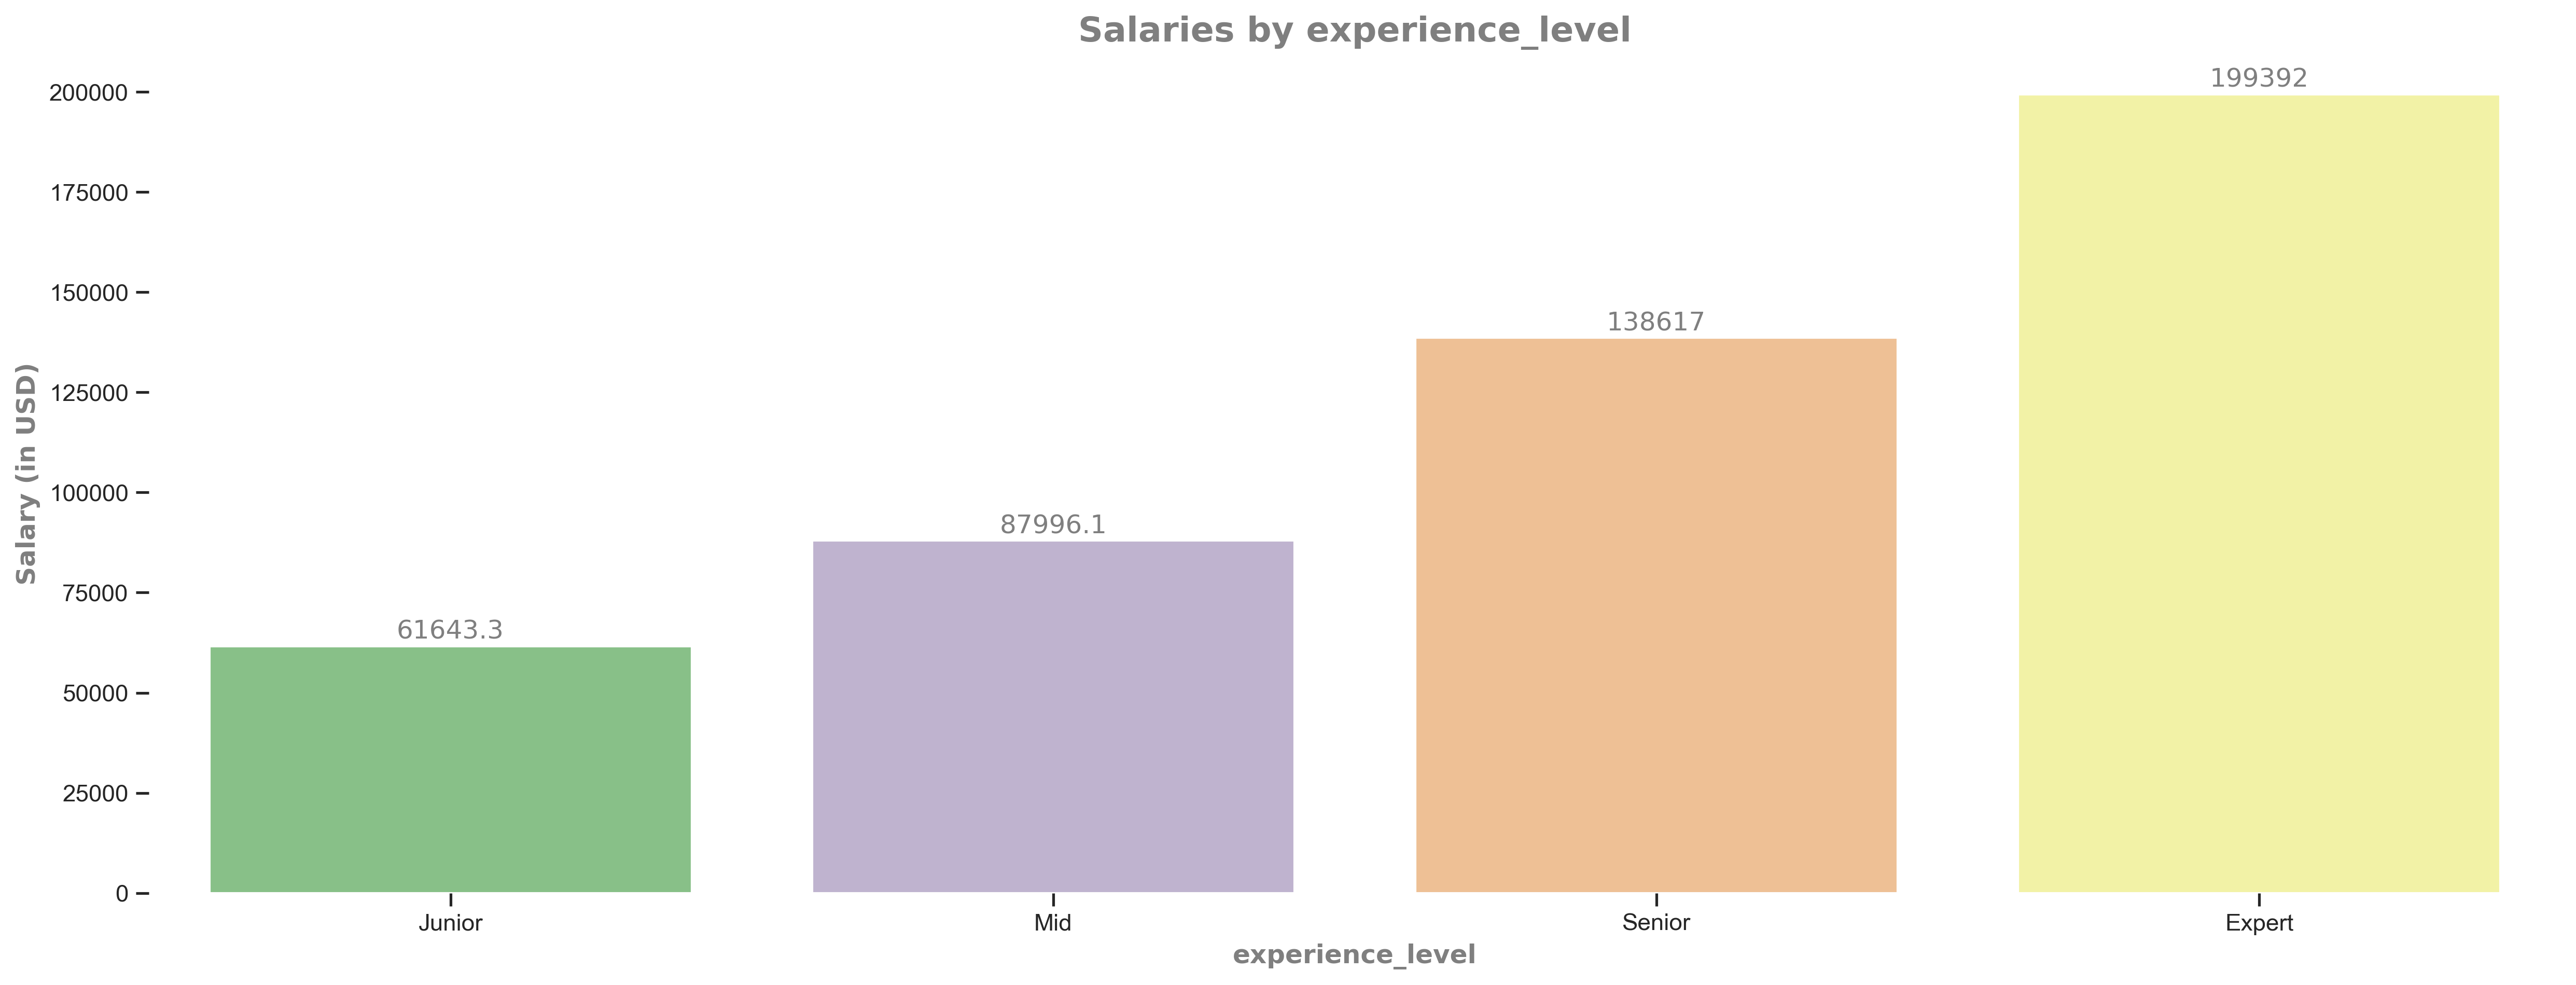

In [ ]:
multivariate_plot(x="experience_level", xlabel="experience_level");

# Juniers earn the lesser salary in the market, whereas as the experts earn the highest salary of the category.

# Though, it depends the port of the company for hiring the experts, but something that we can standard it out is that
# there are data analyst data may carry out function of data scientist or even some that might be identified as
# data eginnering.

In [ ]:
wages_of_ds_by_exp = wages_of_ds.groupby("experience_level")["salary"].mean()
ex_se_diff = (wages_of_ds_by_exp.loc["Expert"] - wages_of_ds_by_exp.loc["Senior"])
se_mi_diff = (wages_of_ds_by_exp.loc["Senior"] - wages_of_ds_by_exp.loc["Mid"])
mi_en_diff = (wages_of_ds_by_exp.loc["Mid"] - wages_of_ds_by_exp.loc["Junior"])
print(f'Expert-Senior Difference: {int(ex_se_diff)} USD ({ex_se_diff / wages_of_ds_by_exp.loc["Senior"] * 100:.2f}%)')
print(f'Senior-Mid Difference: {int(se_mi_diff)} USD ({se_mi_diff / wages_of_ds_by_exp.loc["Mid"] * 100:.2f}%)')
print(f'Mid-Junior Difference: {int(mi_en_diff)} USD ({mi_en_diff /wages_of_ds_by_exp.loc["Junior"] * 100:.2f}%)')

# Salary and Experience level have a positive correlation. Which means, employees with higher experience get higher salaries.
# Salary increase between Mid-level and Entry-level positions are lowest by far (not in percentage).
# Possible Conclusion: If an employee gets more experienced, he/she will earn more money.
# Also, going from entry level to mid-level does not increase salary too much.
# But if an employee keeps working and becoming more experienced, the salary increase comes much more drastic.
# This also can be interpreted as, if you are a senior engineer,
# you can ask for a raise with more confidence because of the job market.


Expert-Senior Difference: 60774 USD (43.84%)
Senior-Mid Difference: 50621 USD (57.53%)
Mid-Junior Difference: 26352 USD (42.75%)


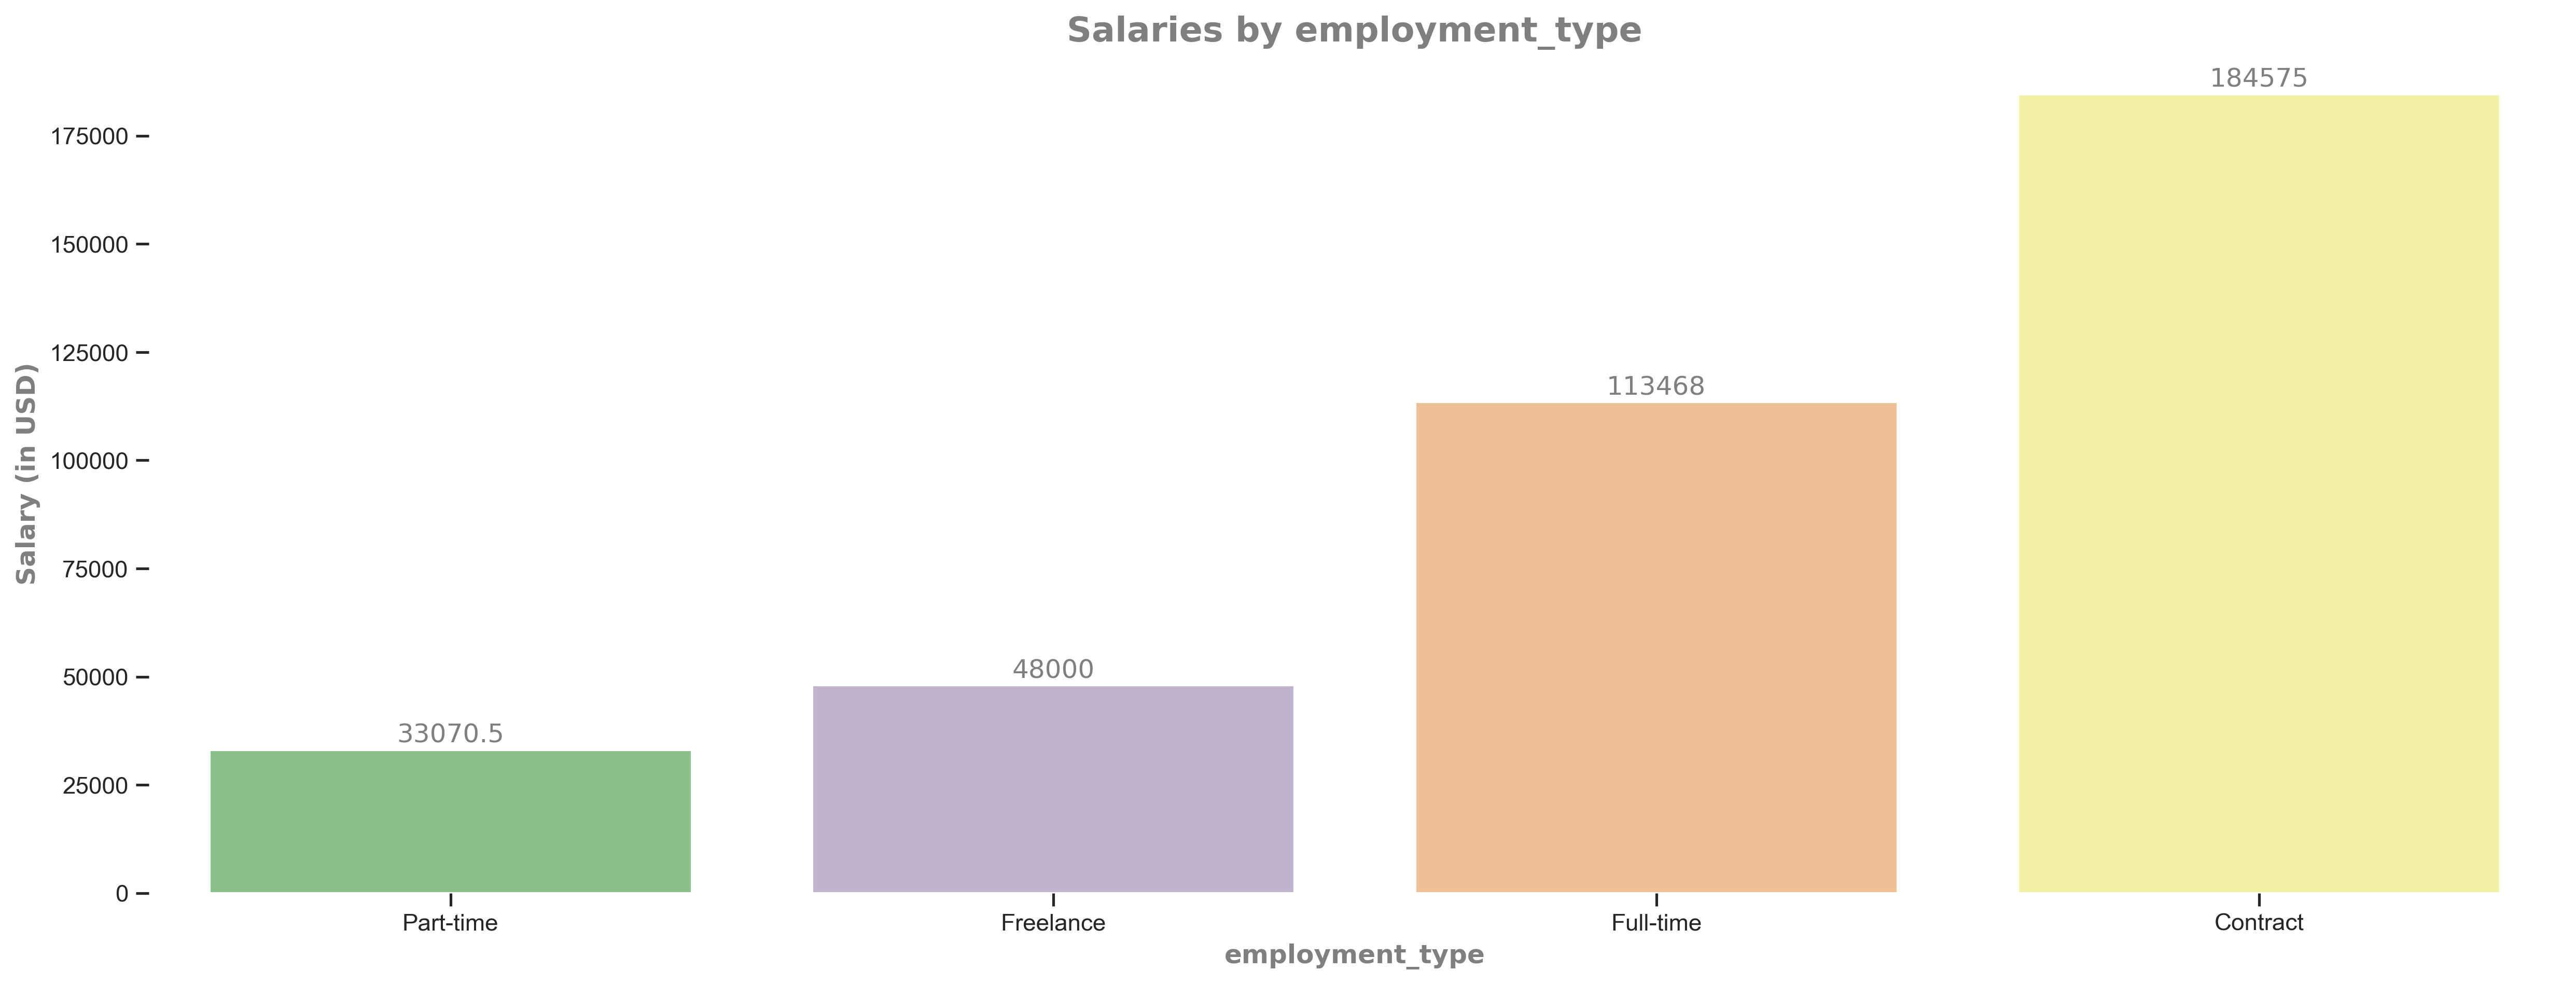

In [ ]:
multivariate_plot(x="employment_type", xlabel="employment_type");

# Must of the companies hire professionals throughout of job contract. Assuredly it is the most best scenario for
# the companies and the professionals.

In [ ]:
wages_of_ds_by_empl_type = wages_of_ds.groupby("employment_type")["salary"].mean()
ft_pt_difference = wages_of_ds_by_empl_type.loc["Full-time"] - wages_of_ds_by_empl_type.loc["Part-time"]
print(ft_pt_difference / wages_of_ds_by_empl_type.loc["Part-time"] * 100)

243.10963889040593


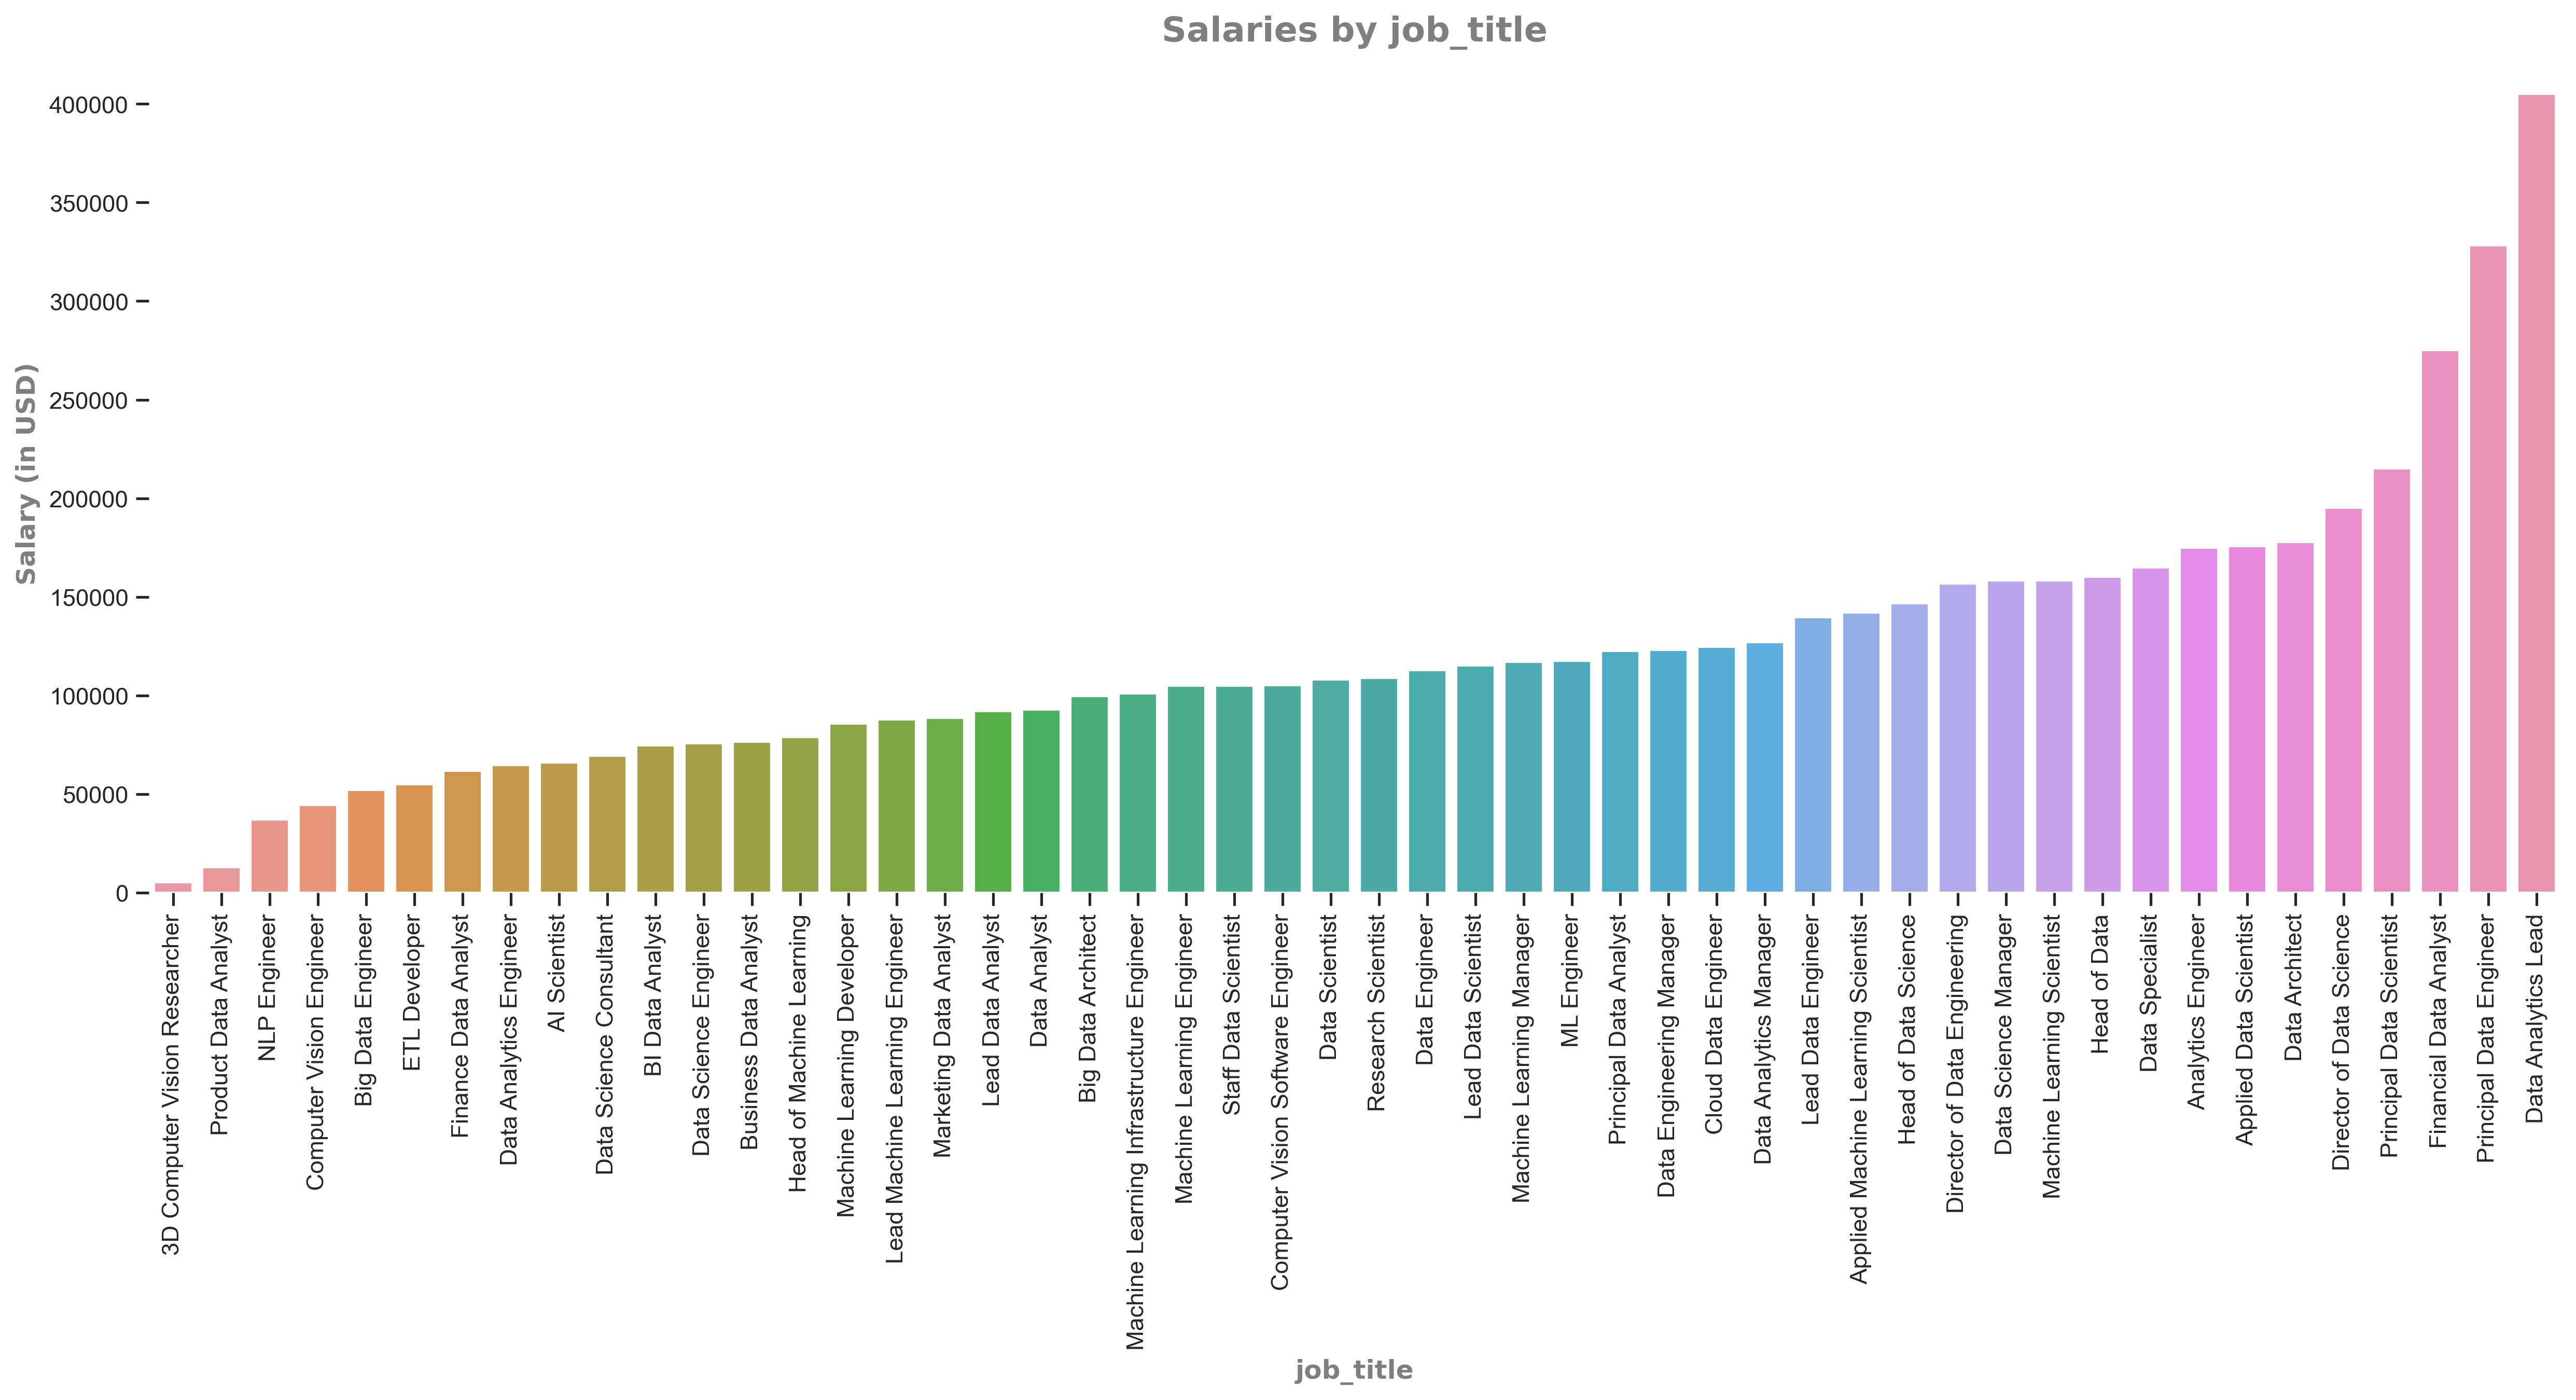

In [ ]:
multivariate_plot(x="job_title", xlabel="job_title", rotation=90, bar_label=False)

In [ ]:
single_entries = pd.DataFrame(data=wages_of_ds["job_title"].value_counts(ascending=True).head(10))
single_entries.columns = ["Number of Salary Data"]
single_entries.index.names = ["Job Title"]
single_entries

# In fact, Data Analytics Lead has a single data entry which may give an unrealistic outcome.
# Surprising part is that, the Principal Data Engineer
# (which was the other title I was suspicious about) does have more than a single entry.
# I will filter the titles that have a single entry (just to be safe).

Number of Salary Data
Job Title                                            
3D Computer Vision Researcher                       1
NLP Engineer                                        1
Head of Machine Learning                            1
Staff Data Scientist                                1
Big Data Architect                                  1
Finance Data Analyst                                1
Data Specialist                                     1
Marketing Data Analyst                              1
Lead Machine Learning Engineer                      1
Machine Learning Manager                            1

In [ ]:
wages_of_ds_mult_entry= wages_of_ds.groupby("job_title").filter(lambda x: len(x) > 1)

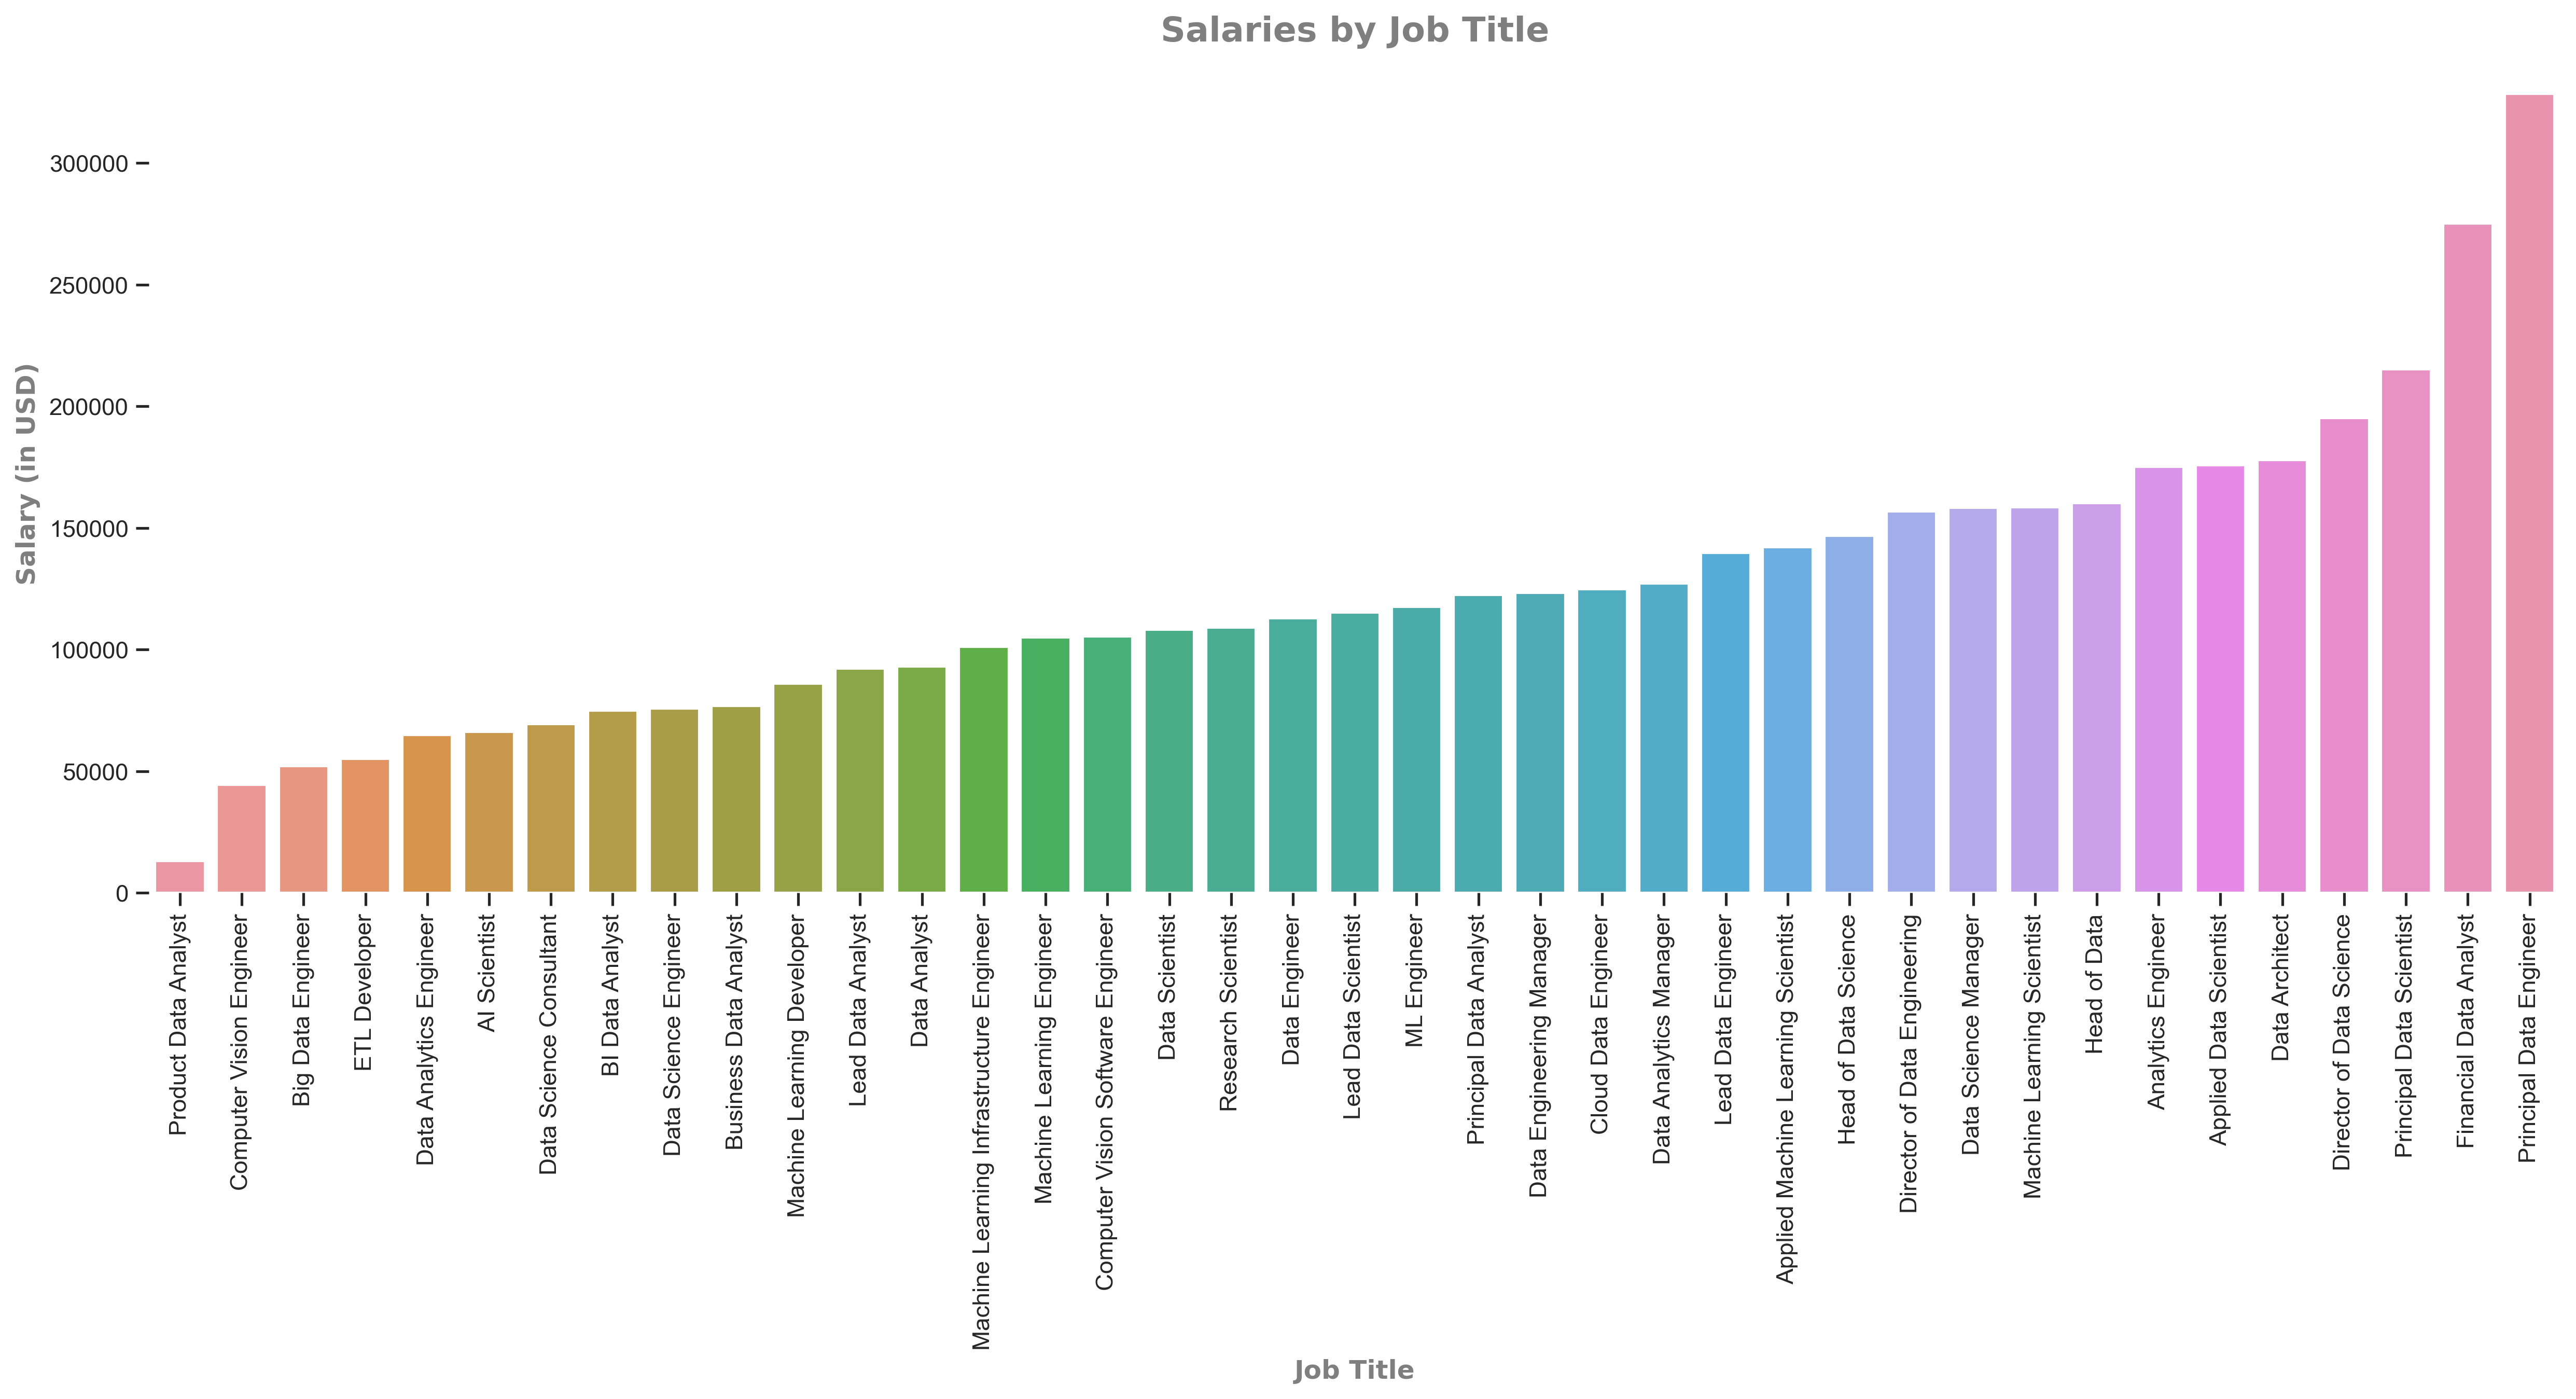

In [ ]:
multivariate_plot(df=wages_of_ds_mult_entry, x="job_title", xlabel="Job Title", rotation=90, bar_label=False)

In [ ]:
sus_titles = ["Principal Data Engineer", "Financial Data Analyst", "Product Data Analyst"]
sus_title_salaries = wages_of_ds_mult_entry[wages_of_ds_mult_entry["job_title"].isin(sus_titles)]
sus_wages_of_ds = pd.DataFrame(sus_title_salaries.groupby("job_title")["company_location"].value_counts())
sus_wages_of_ds.columns = ["Number of Salary Data"]
sus_wages_of_ds.index.names = ["Job Title", "Company Location"]
sus_wages_of_ds


# Both Financial Data Analyst and Principal Data Engineer salaries are based in US. Meanwhile,
# Product Data Analyst data comes from Honduras and India. This may be the reason behind the salary difference.
# I will check the average salaries in US, IN, and HN to prove my point.


Number of Salary Data
Job Title               Company Location                       
Financial Data Analyst  US                                    2
Principal Data Engineer US                                    3
Product Data Analyst    HN                                    1
                        IN                                    1

In [ ]:
in_and_us_wages_of_ds = wages_of_ds[wages_of_ds["company_location"].isin(["US", "IN", "HN"])]

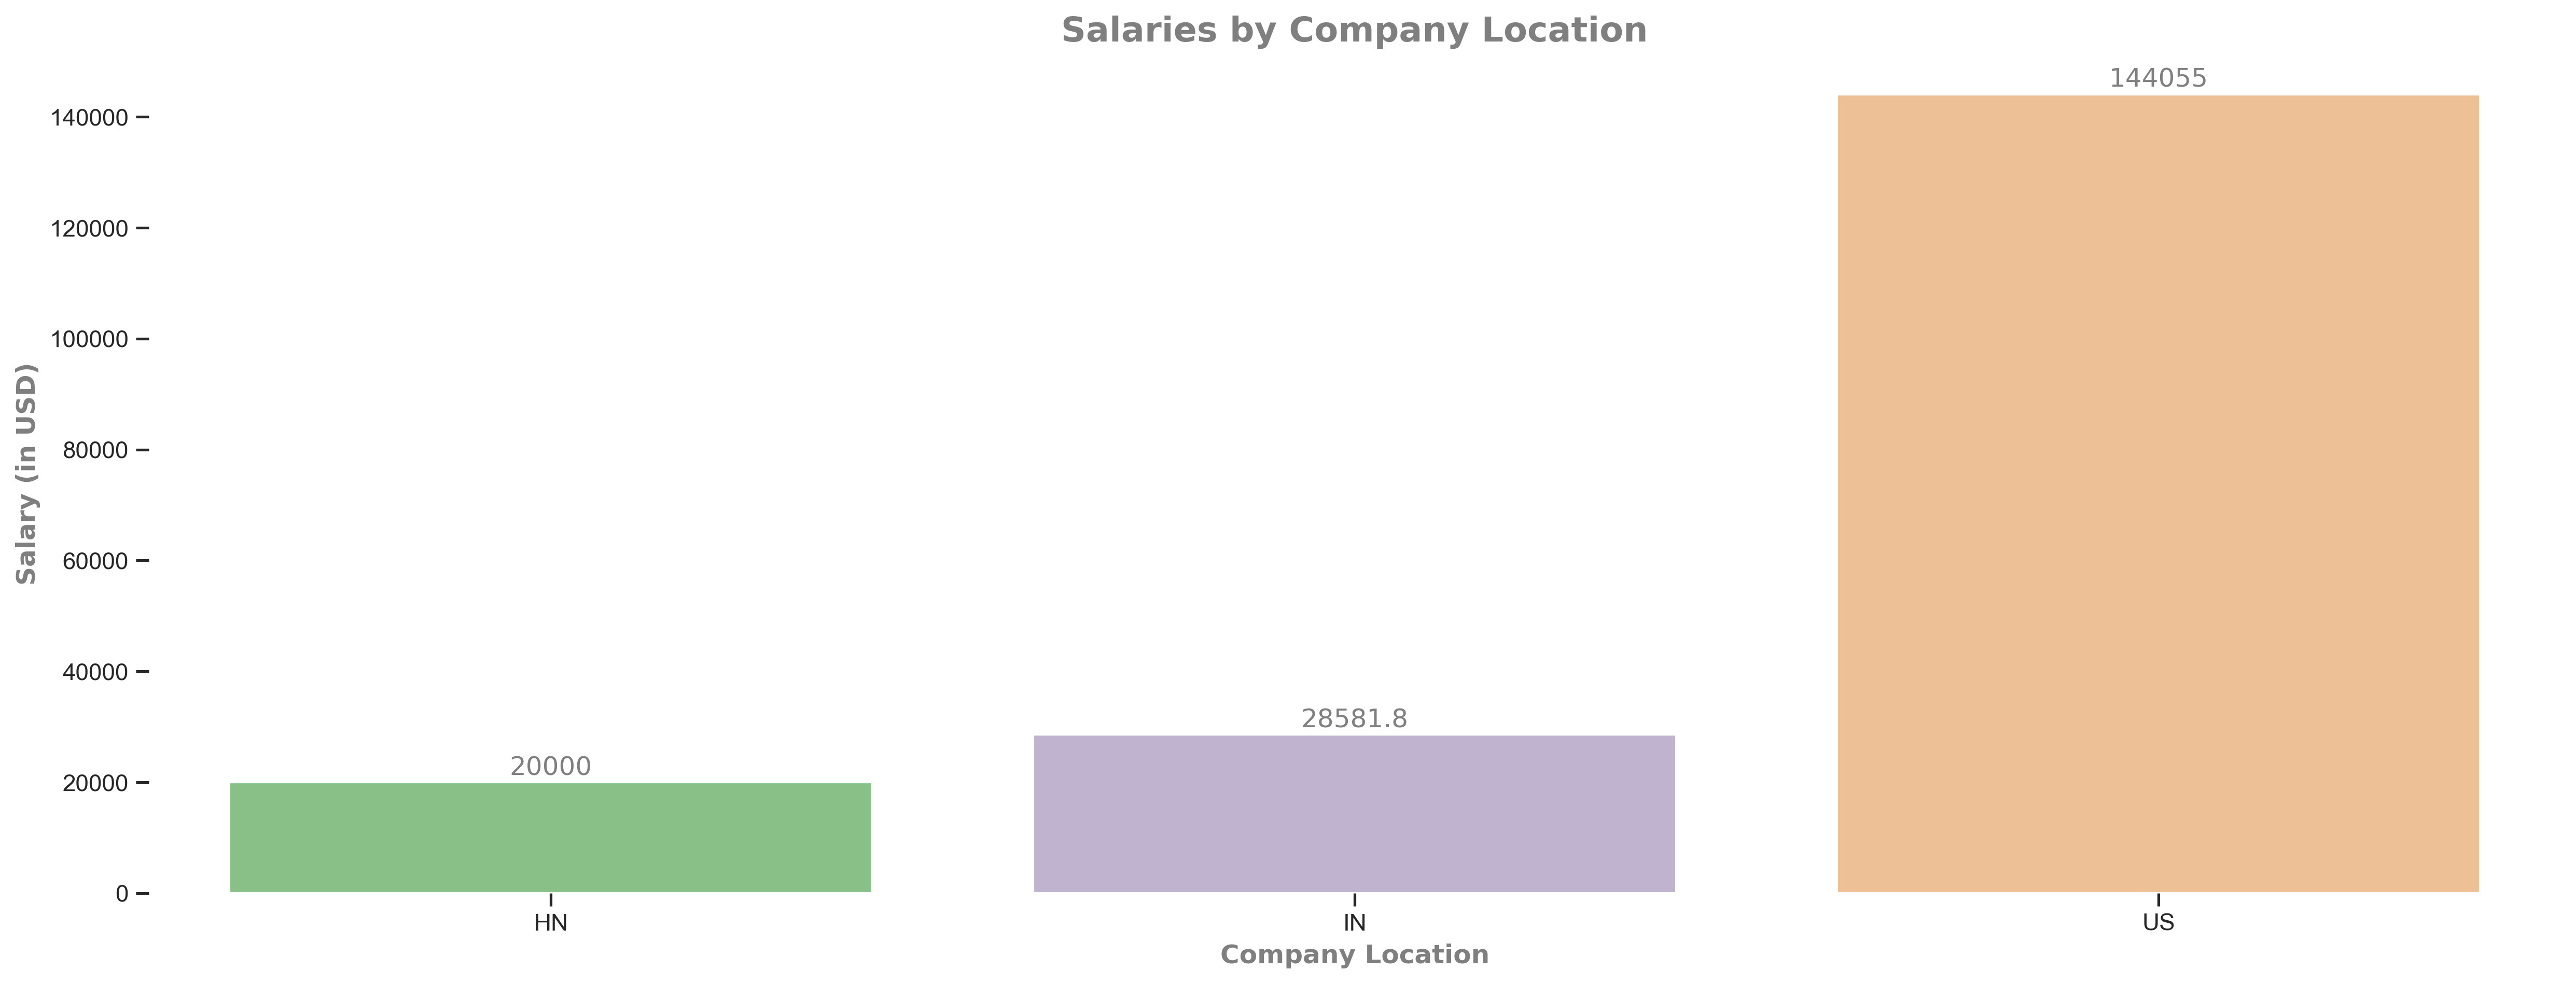

In [ ]:
multivariate_plot(df=in_and_us_wages_of_ds, x="company_location", xlabel="Company Location")

# United Stated of American has one of the highest salary for the categary in the wolrd.
# Thinking over this interpretation it might be a grand opportunity for us as a data analysts, or data scientists, and so one.


# I personally is on my track to initiate my career as a Data analyst. 09/13/2023

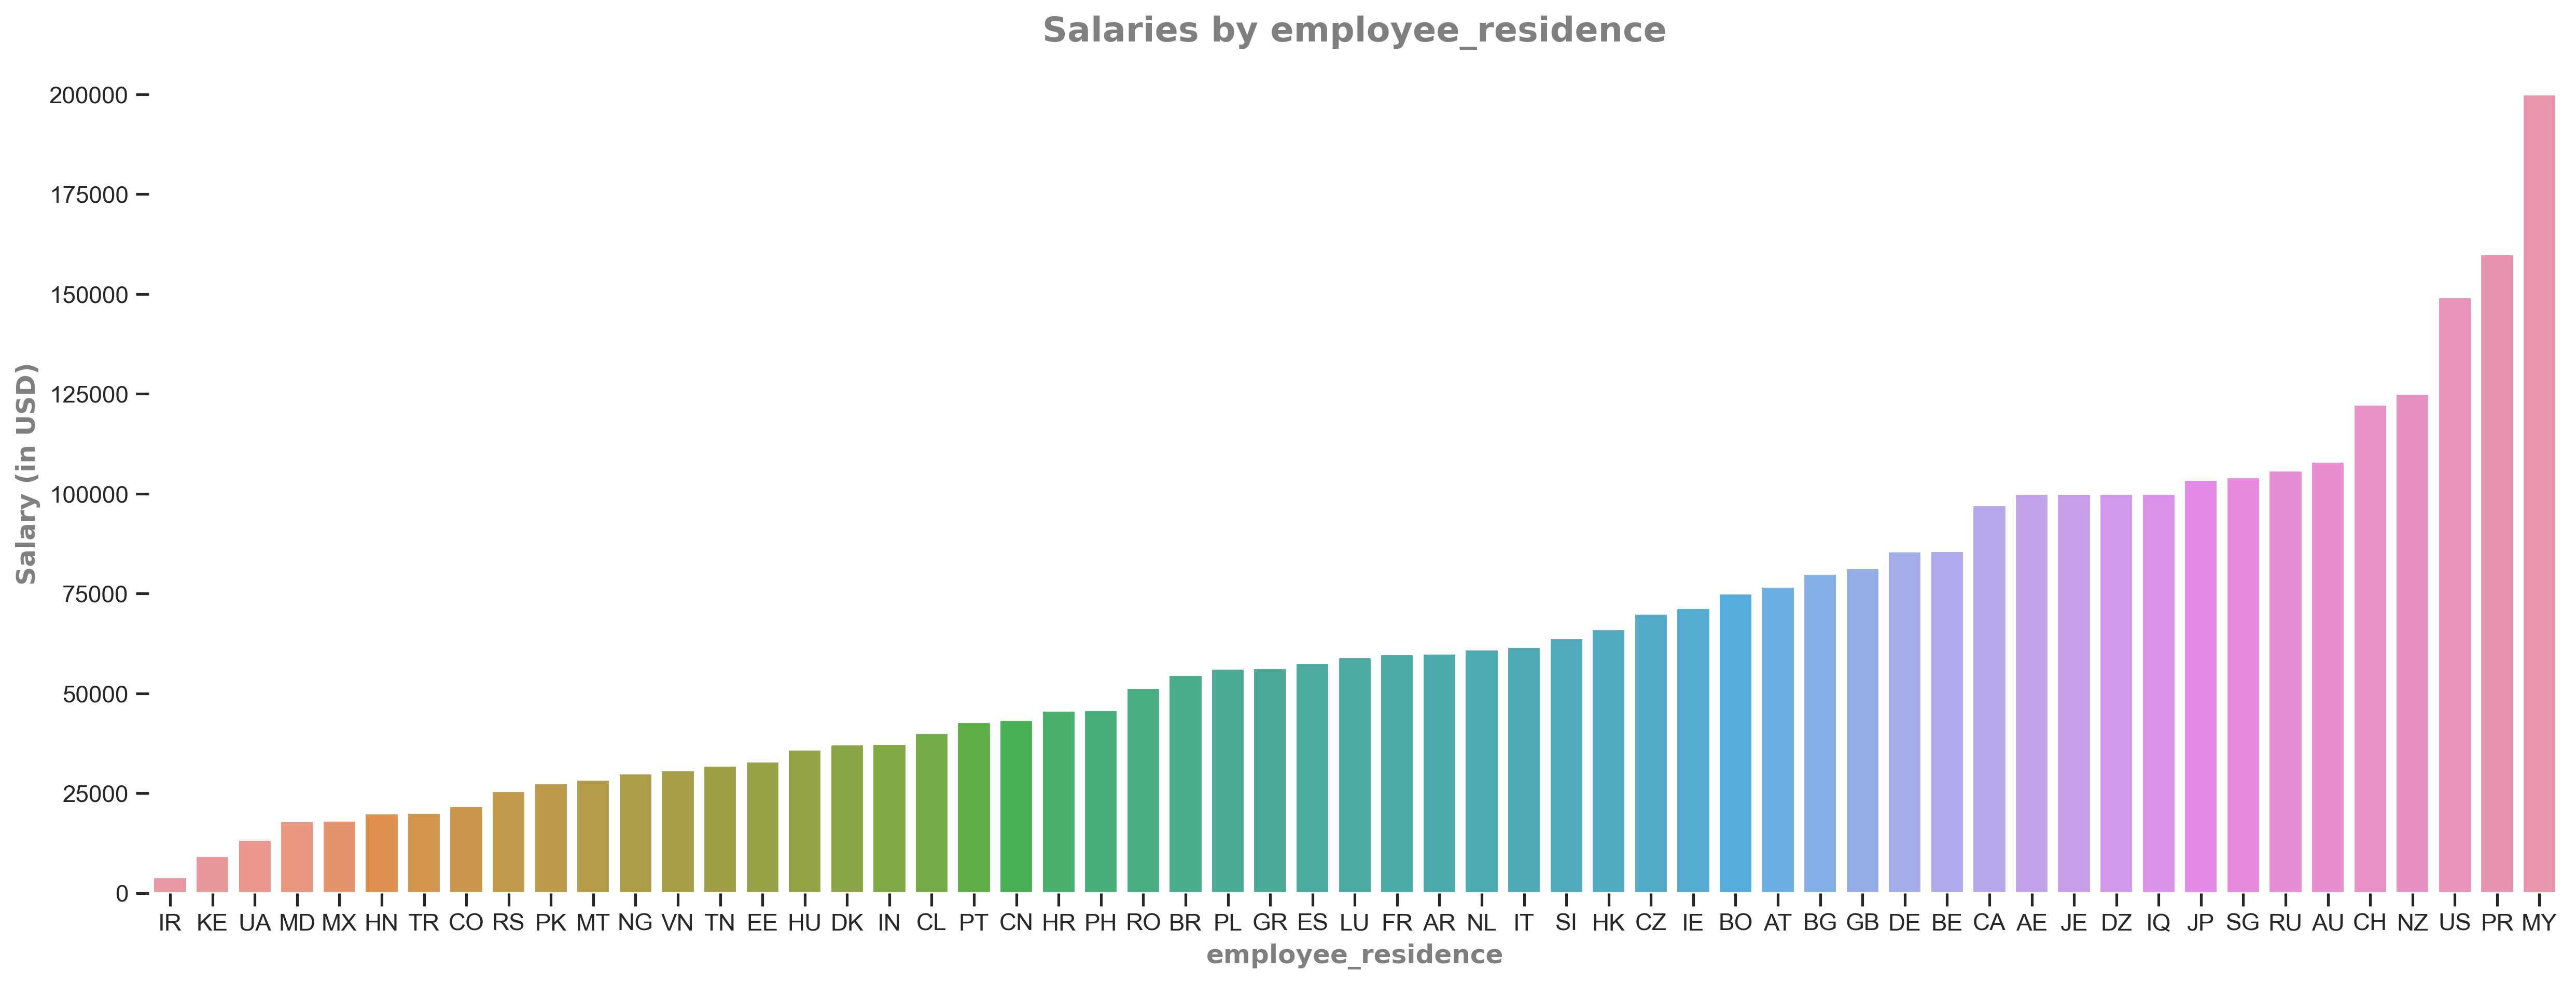

In [ ]:
# Employee Residence and Salary

multivariate_plot(x="employee_residence", xlabel="employee_residence", bar_label=False)

In [ ]:
# After what happened in job title analysis, I will check the number of salary data for each country.
# There may be a country with a single entry which does not reflect reality.

sus_employee_res = pd.DataFrame(wages_of_ds["employee_residence"].value_counts(ascending=True).head(10))
sus_employee_res.columns = ["Number of Salary Data"]
sus_employee_res.index.names = ["Country Code"]
sus_employee_res

# There are a lot of countries with a single entry. I prefer to filter these countries.
# Even though, I will be filtering so many countries, but I think this is the best approach in this situation.
#Because, I believe that a single entry is not reliable.

Number of Salary Data
Country Code                       
CH                                1
LU                                1
RS                                1
HR                                1
BG                                1
IE                                1
IQ                                1
PH                                1
UA                                1
CL                                1

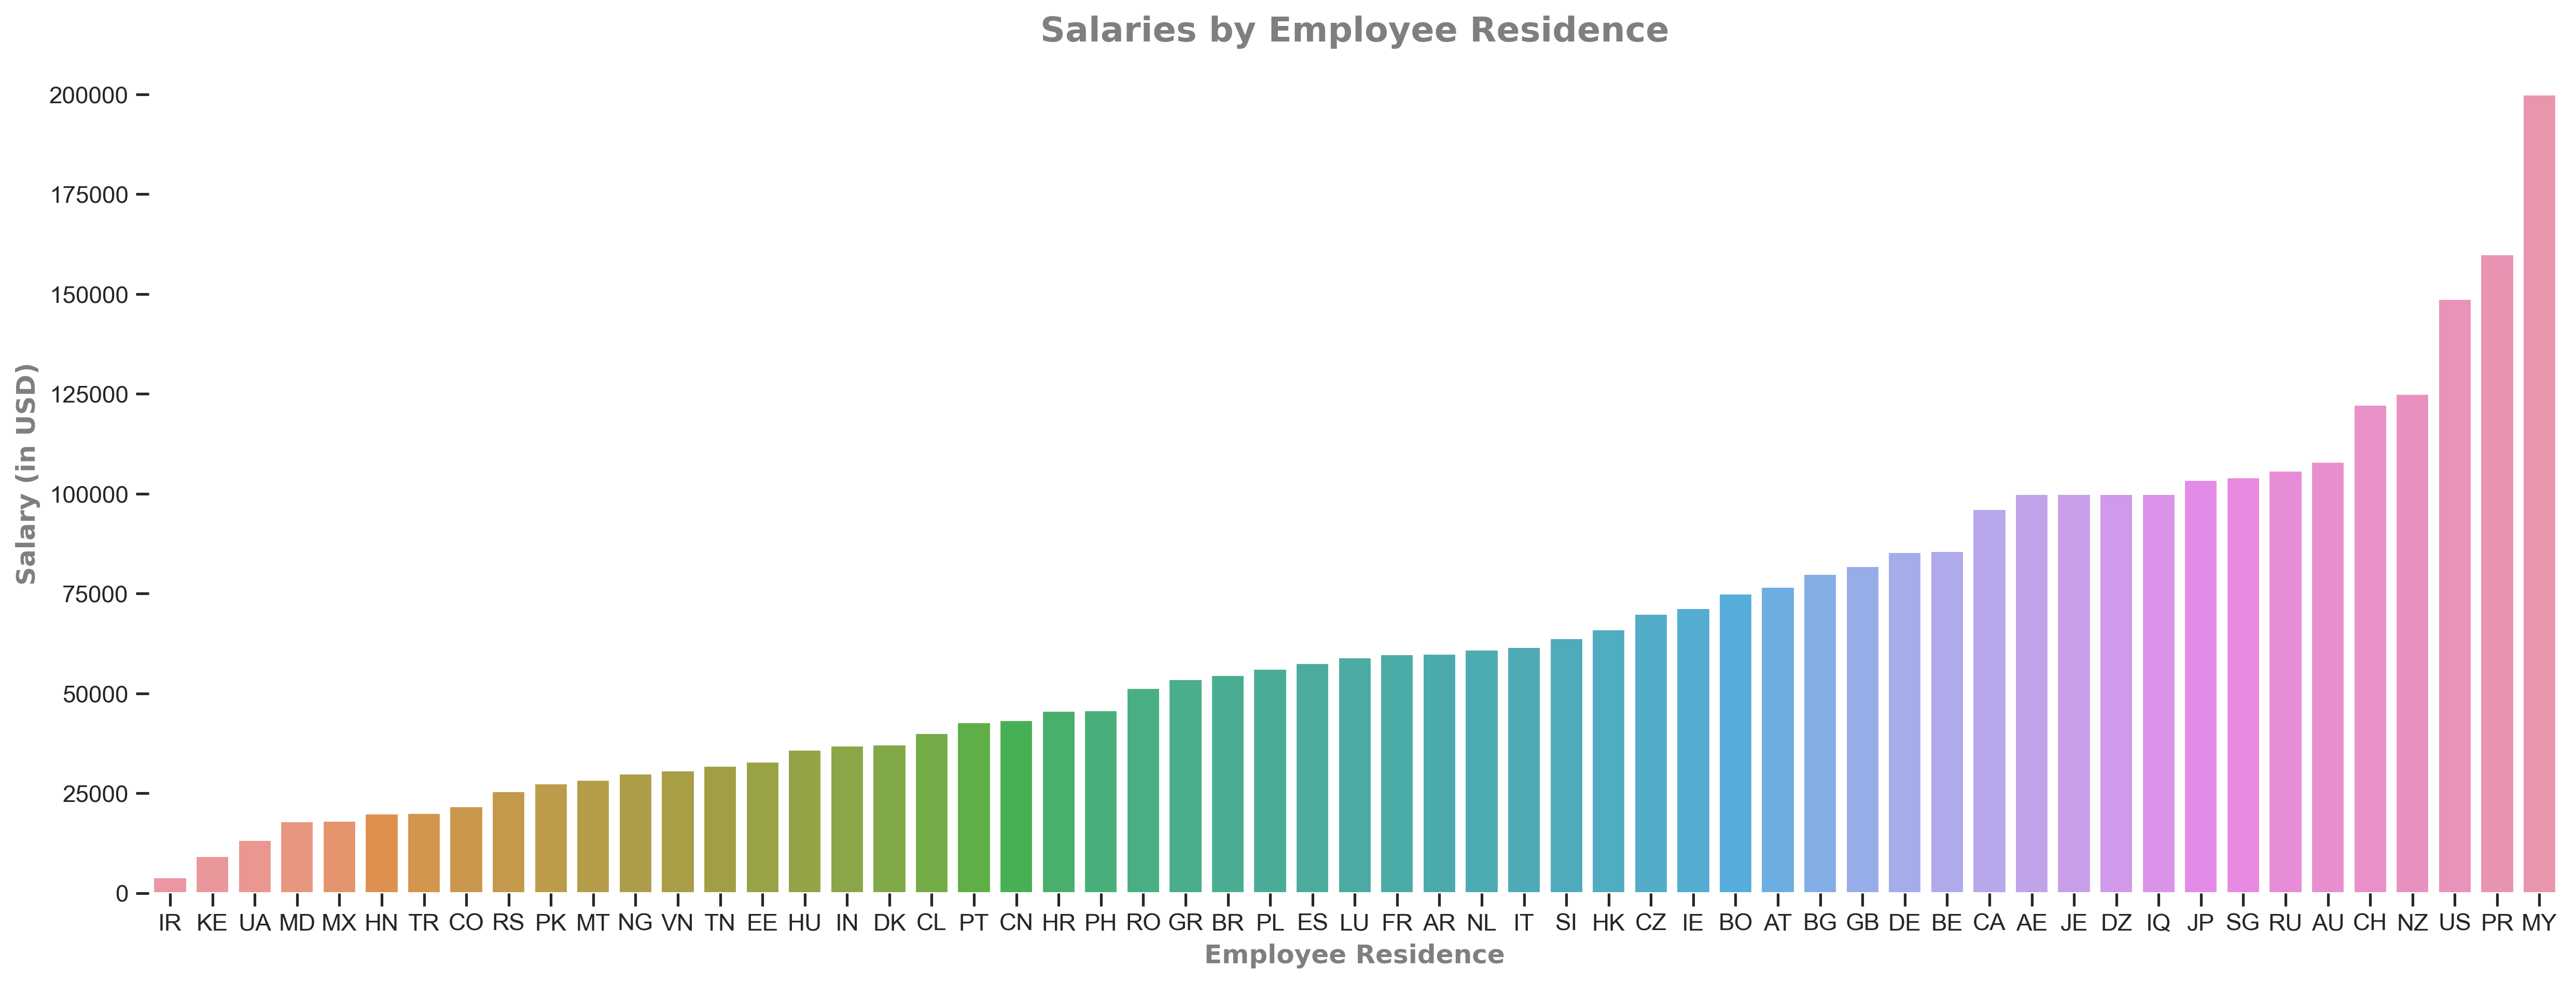

In [ ]:
multivariate_plot(df=wages_of_ds_mult_entry, x="employee_residence", xlabel="Employee Residence", bar_label=False)

# Now it looks more realistic and reliable.

# Employees living in the US, earning the most with over 140k USD.
# Japan, United Arab Emirates, Canada, Russia, Singapore, and Australia are really close.
# Employees that are living in these countries earn slightly over 100k USD.
# Mexico and Turkey are the lowest ones with below 20k USD.

# Possible Conclusion: Salaries in the US are highest.
# This may be due to the fact that the number of big companies is way higher in the US than in any other country.
# Meanwhile, the lowest salaries are in Turkey and Mexico. This can be related to currency differences.
# Because we are analyzing salaries in USD.

# I would like to undercorse Brazil´s market for the field is offering a mean of salary like some countries in Europe
# such as Portugal,France and so forth.

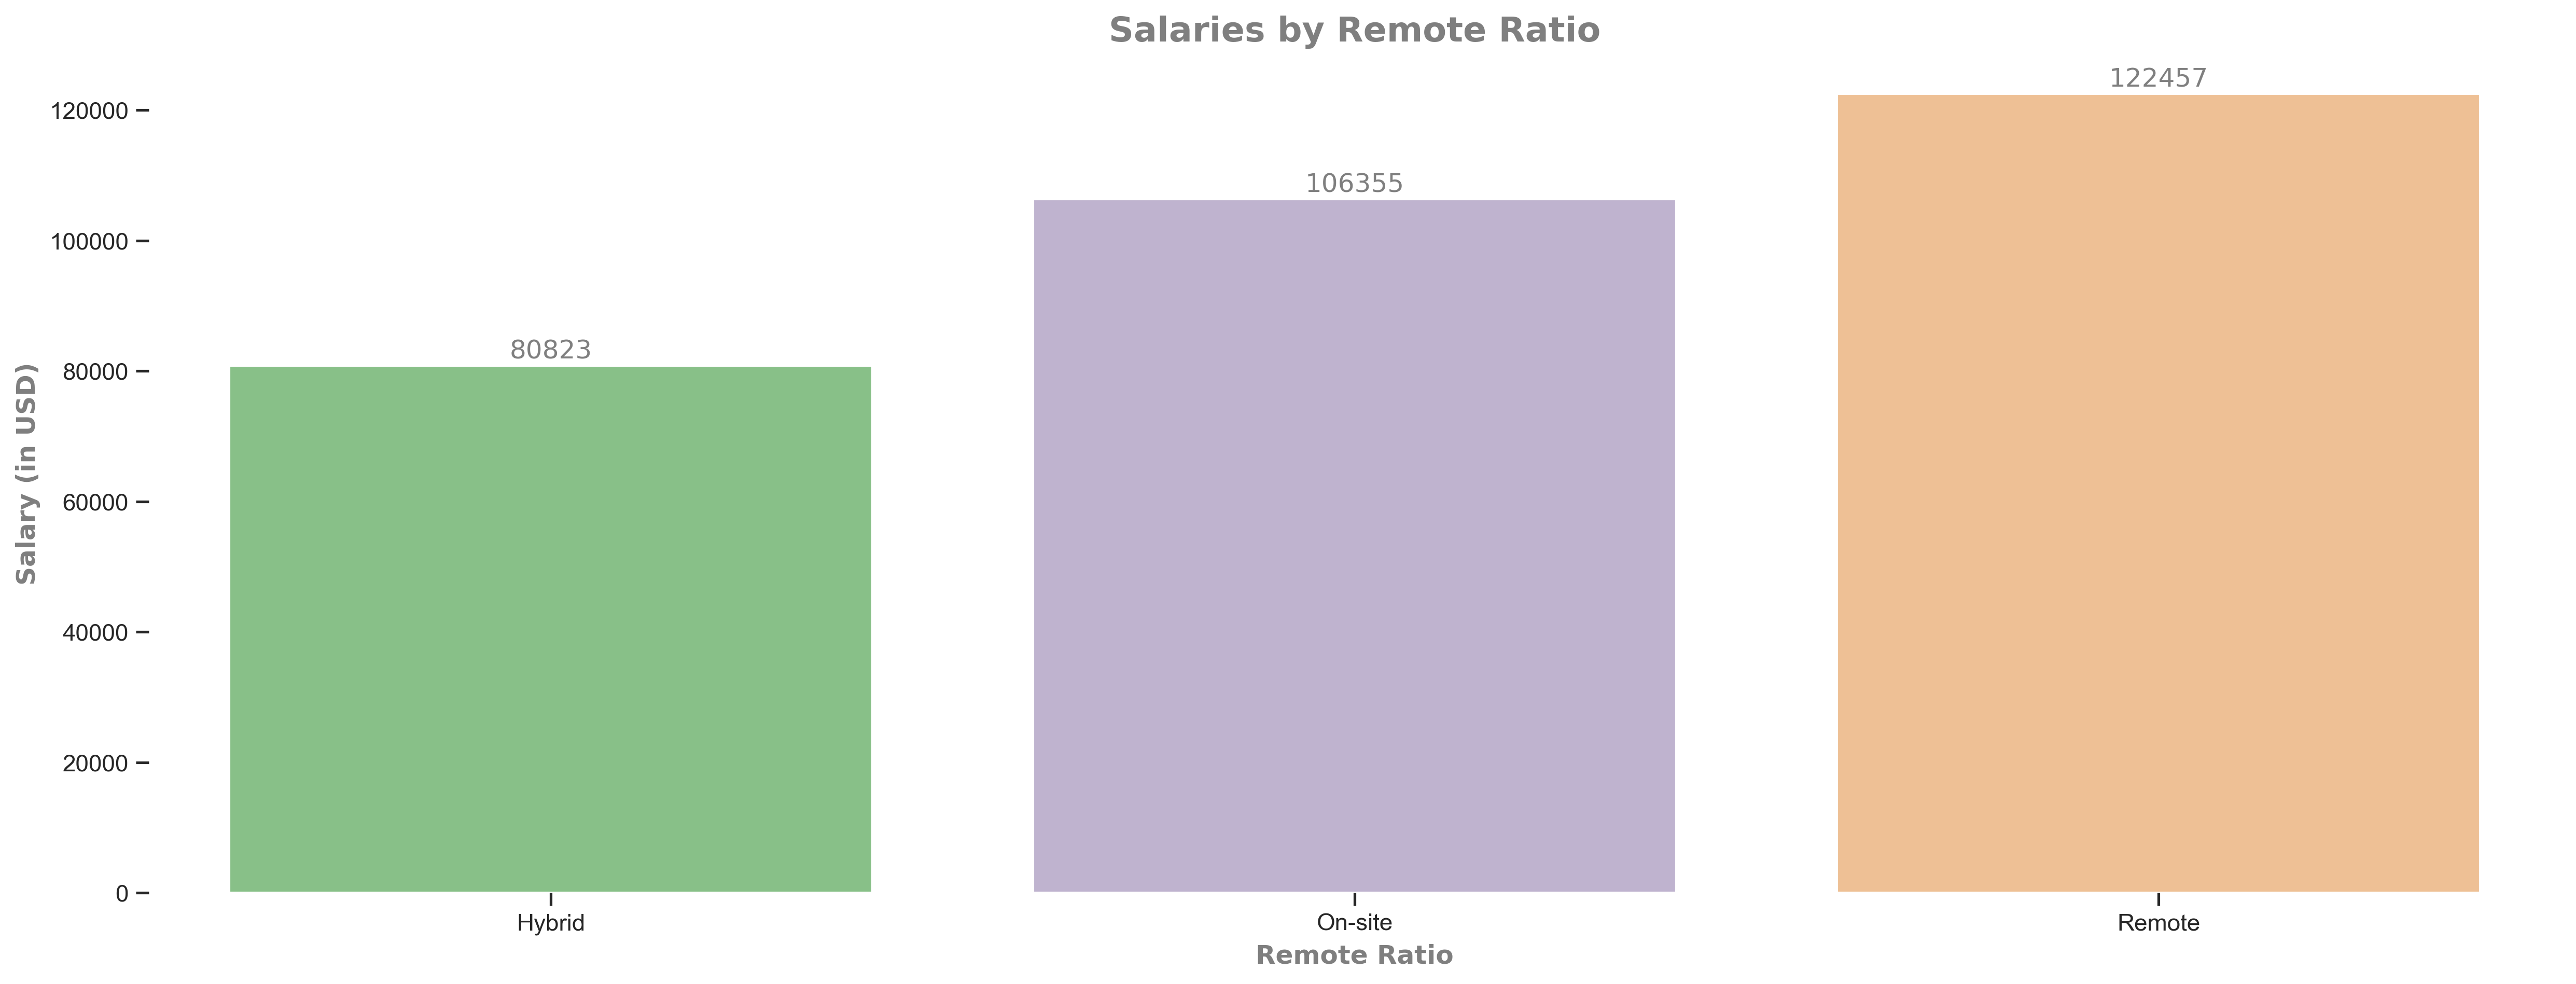

In [ ]:
# Now it looks more realistic and reliable.

# Employees living in the US, earning the most with over 140k USD.
# Japan, United Arab Emirates, Canada, Russia, Singapore, and Australia are really close.
# Employees that are living in these countries earn slightly over 100k USD.
# Mexico and Turkey are the lowest ones with below 20k USD.

# Possible Conclusion: Salaries in the US are highest.
# This may be due to the fact that the number of big companies is way higher in the US than in any other country.
# Meanwhile, the lowest salaries are in Turkey and Mexico. This can be related to currency differences.
# Because we are analyzing salaries in USD.

# I would like to undercorse Brazil´s market for the field is offering a mean of salary like some countries in Europe
# such as Portugal,France and so forth.


multivariate_plot(x="remote_ratio", xlabel="Remote Ratio")

# Remote working employees earning the most.
# On-site work is more valuable than hybrid which is quite surprising to me.
# These results may be correlated with countries.
# As we learned previously, some countries like the US are providing higher salaries.
# I suspect that, maybe big portion of the remote workers are working for the US based companies.

# Considering that many times the US hires these professional oversee, and when they aim at emerging countries like
# Brazil, India and other countries the cost of these professional of high performance and qualification is lesser than
# if they were contract in the develop countris. (Paulo Cesar da Silva)

# That's why, I will analyze these ratios with countries to prove my point.


In [ ]:
full_remote_by_country = wages_of_ds[wages_of_ds["remote_ratio"] == "Remote"]["company_location"].value_counts(ascending=False)
most_common_countries = list(full_remote_by_country.head(5).index)
remote_with_most_common_country = wages_of_ds[wages_of_ds["company_location"].isin(most_common_countries)]

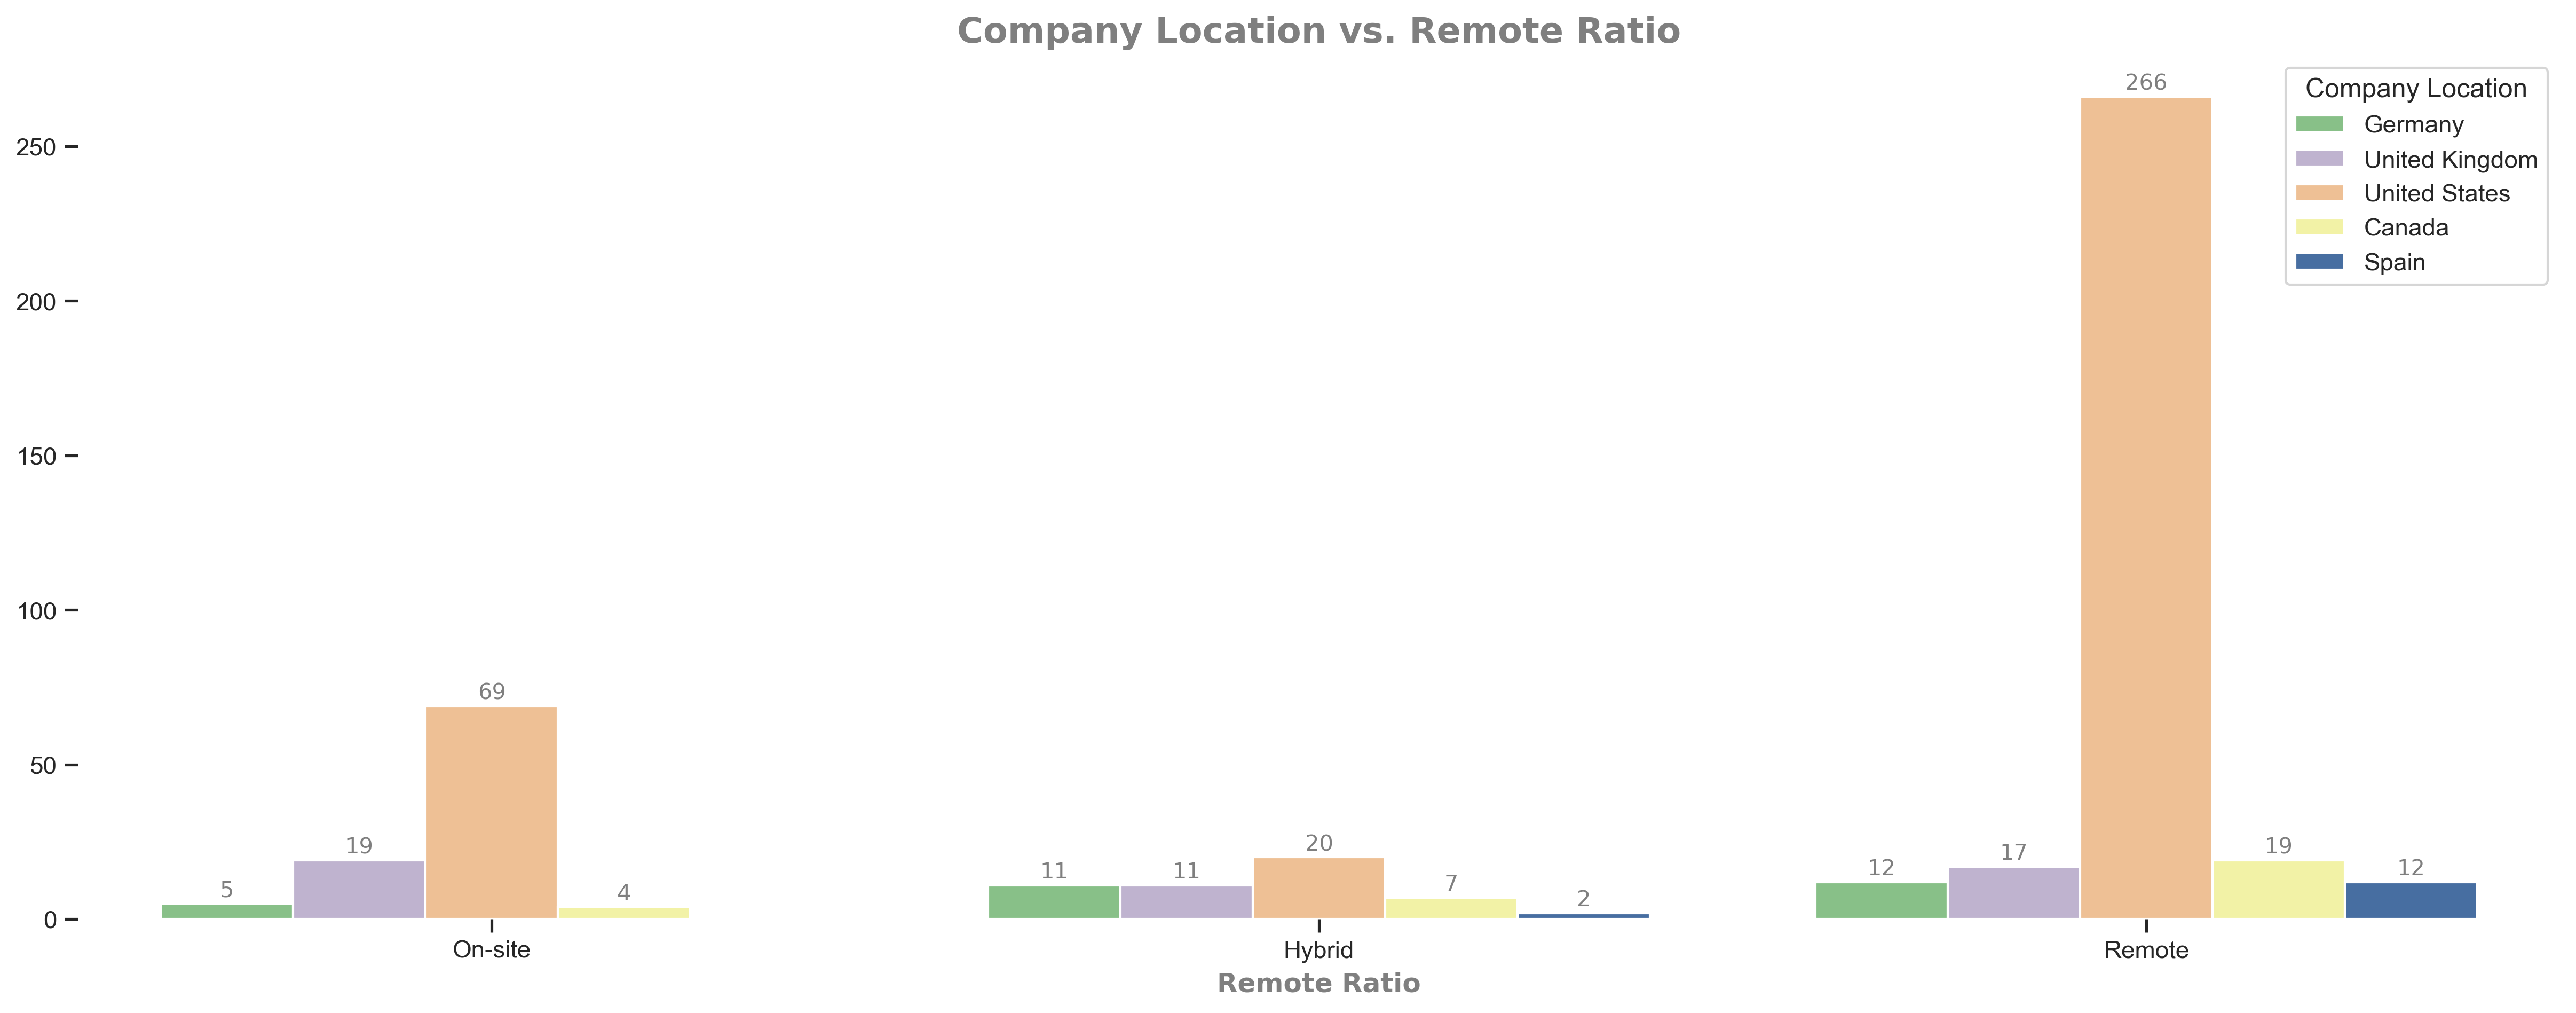

In [ ]:
multivariate_count_plot(df=remote_with_most_common_country, x="remote_ratio", hue="company_location",
                       xlabel="Remote Ratio", hue_label="Company Location", bar_label=True, legend=True, convert=True)


# I, Paulo Cesar da Silva

# I am sharing a insight for the American´s campanies that this situation in the new format might have
# bad situation for many owers of buldings in the New York City for example if this trend popping up, it
# might provoke a prejuice for many building generating a great cust for many company. summarizing, the gain by one side,
# lose by the other.

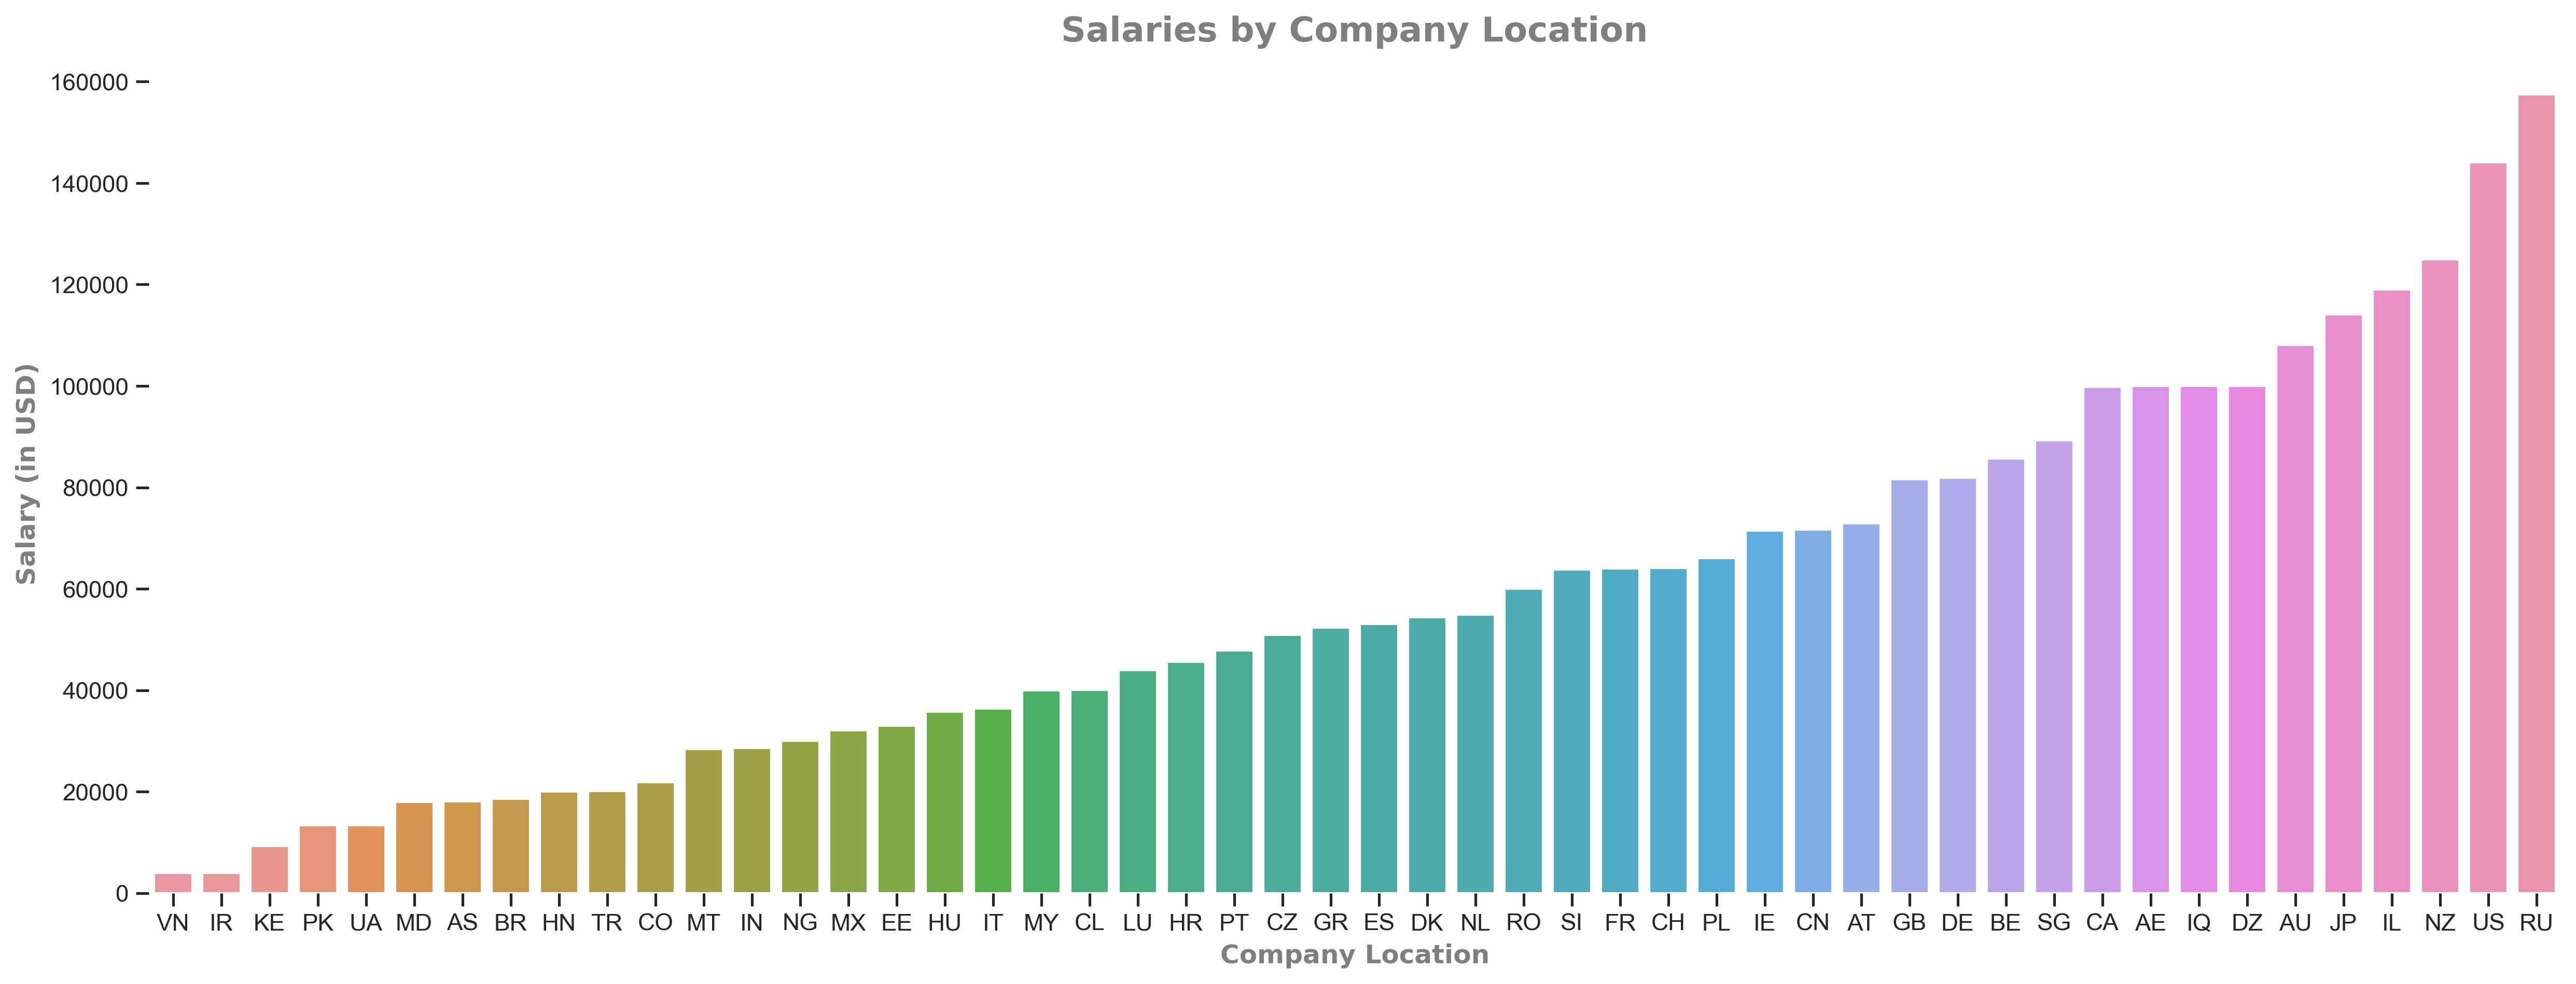

In [ ]:
# Company Location and Salary

multivariate_plot(x="company_location", xlabel="Company Location", bar_label=False)

In [ ]:
# Must be checked --  I will check if there are any countries with single entry. (Because of what happened previously)

sus_company_loc = pd.DataFrame(wages_of_ds["company_location"].value_counts(ascending=True).head(10))
sus_company_loc.columns = ["Number of Salary Data"]
sus_company_loc.index.names = ["Country Code"]
sus_company_loc


# There are a lot of countries with single or two entries.
# I will filter them from the dataset because it is not reliable.

# The US takes first place with a salary of more than 140k USD. The graph is very similar to Employee Residence.
# Possible Conclusion: Companies based in the United States pay the highest wages.
# Japan, Canada, Australia, and United Arab Emirates are really close to each other.
# These results may be correlated with the countries' currencies.

Number of Salary Data
Country Code                       
IE                                1
CL                                1
MT                                1
IL                                1
UA                                1
IQ                                1
RO                                1
SG                                1
HR                                1
MD                                1

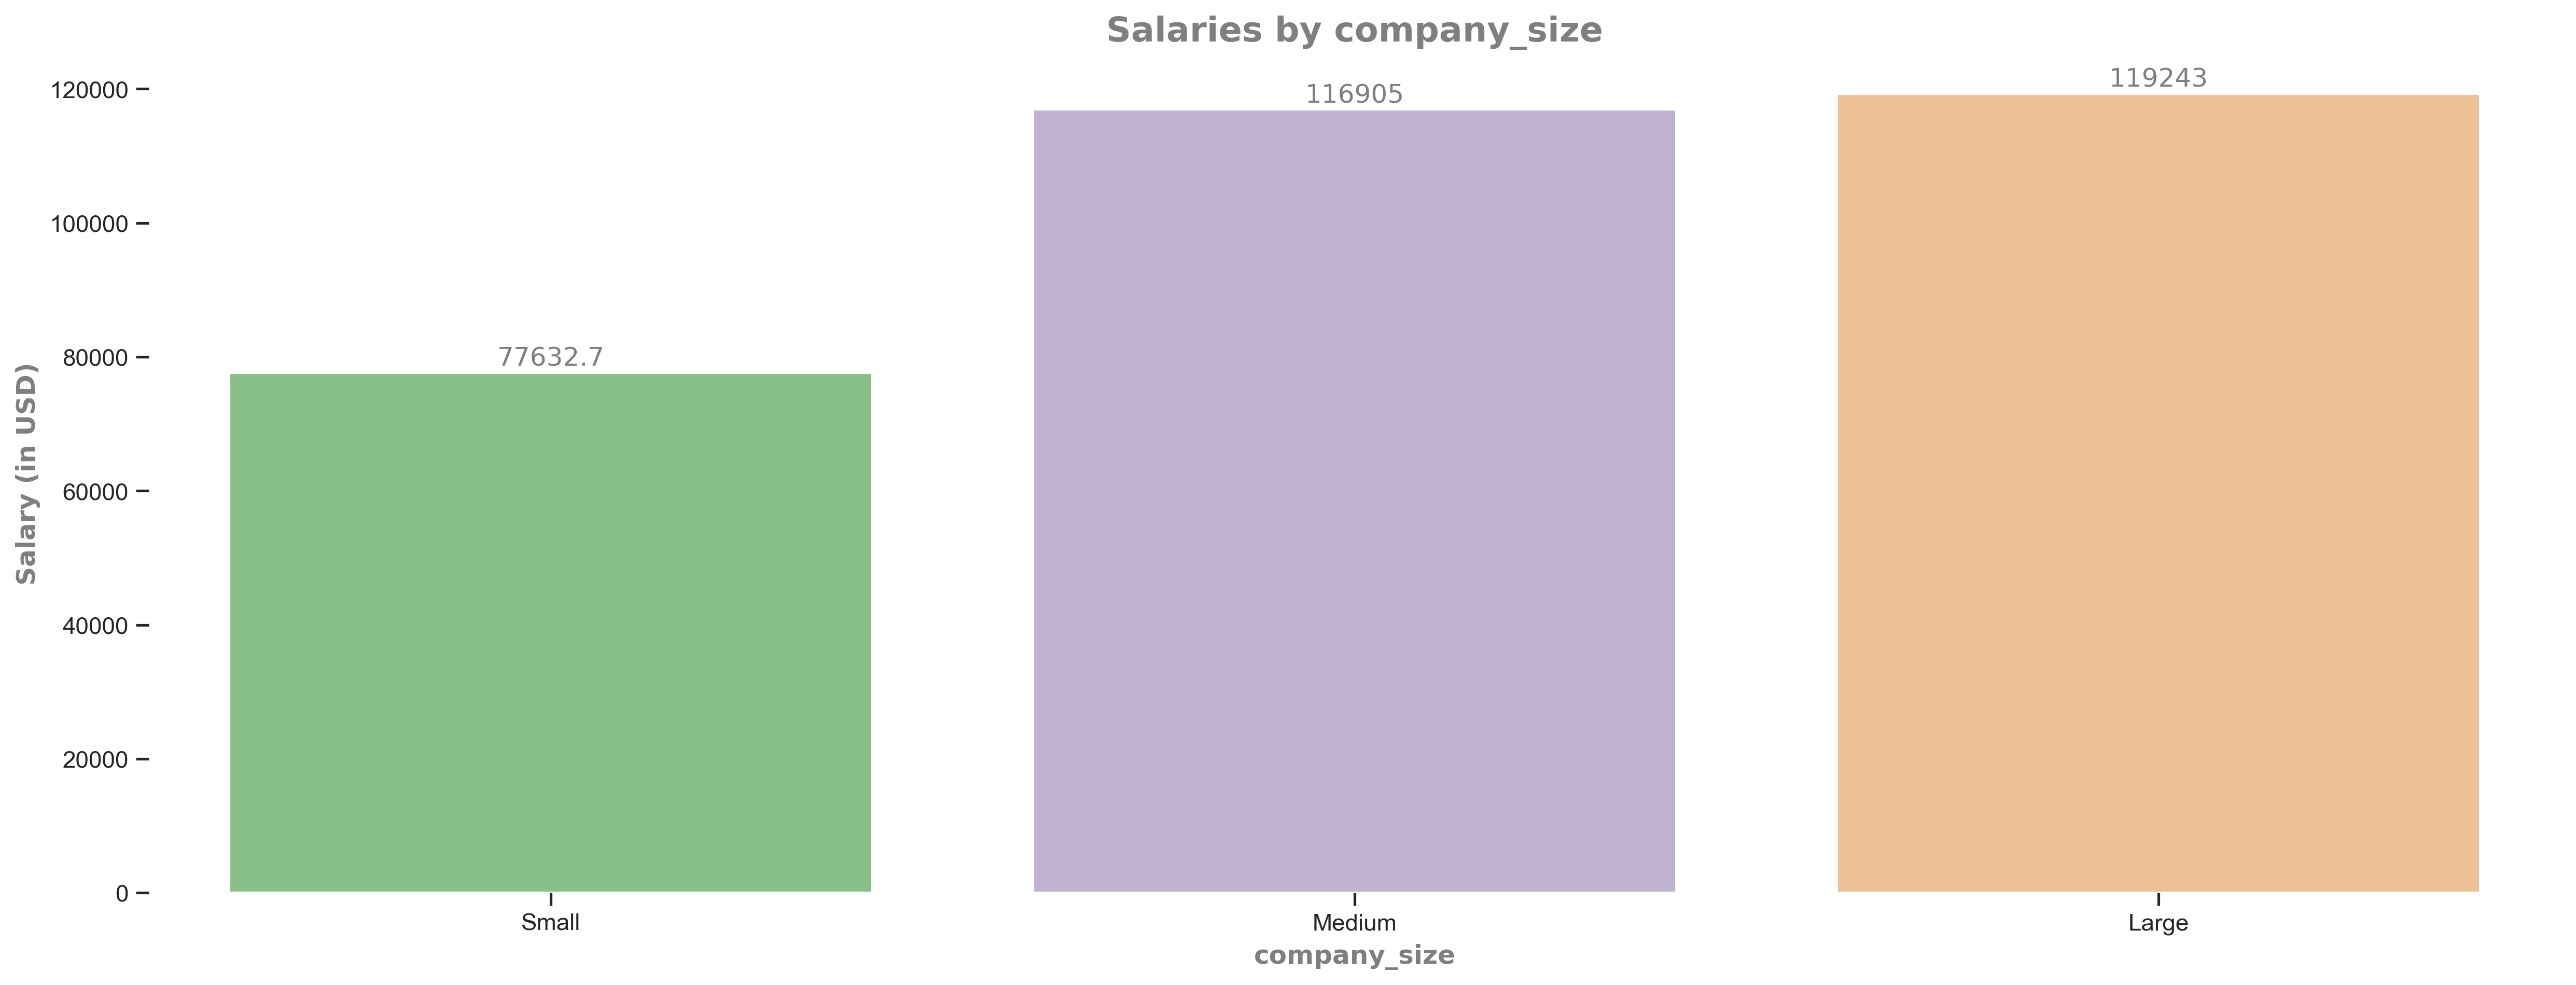

In [ ]:
# Company Size and Salary

multivariate_plot(x="company_size", xlabel="company_size")

In [ ]:
# 6. Conclusion


# We got some ideas by analyzing this dataset.

# Data science jobs are getting more popular.
# If an employee wants to get the highest salary possible, United States should be their choice.
# But of course, this analysis is purely based on the salaries. To give an answer to this,
# we should also analyze the cost of living, health-care, etc.

# More and more countries in the whole world will need to hire these professional more over you were
# high qualified more over you might get excellent opportunities.